# Klong beam simulation: tracks to hits, take 10 (planar beam pipe shielding)
### analysis variation with tungsten plug thickness uniformly sampled on [10,20]cm
This is a reanalysis of Klong_hits10, based on special tags named trackOrigin added to the TruthPoint information saved when particles being tracked through the detector geometry interact with sensitive elements of the detector. The TruthPoint list records the full list of interaction vertices from a given hit leading back to the primary particle that produced it. For more information about the take 10 simulation, see the Klong_hits10 notebook.

In [1]:
import os
import numpy as np
os.chdir("/srv/jupyter/hdgeant4 studies")
#%pip install --user "gluex.hddm_s>=2.3.3"
from gluex import hddm_s
from gluex import xrootd_client as xclient
#%pip install --user "gluex.jupyroot>=1.0.10"
from gluex.jupyroot.hddmview import hddmview
import ROOT
#%jsroot on

In [2]:
import dask.distributed
import dask
dclient = dask.distributed.Client(n_workers=50, threads_per_worker=1, dashboard_address='0.0.0.0:8790')

/srv/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8790 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36845 instead
  warnings.warn(


In [3]:
xrdurl = "root://cn445.storrs.hpc.uconn.edu"
xrdpath = "/Gluex/resilient/simulation/KLFbeam-8-2024/"
infile = xrdurl + xrdpath + "KLFbeam10_{0}.hddm"

In [4]:
infiles = [infile.format(i+1) for i in range(10000)]
hview = hddmview(infiles, hddm_s, f"Klong_tracks10.root")
hviews = {}
for hset in ("sc", "cdc", "fdc", "bcal", "fcal", "ftof") :
    hviews[hset] = hview
    hviews[hset].enable_dask_cluster(dclient)

In [5]:
particle_mass = {
    1: 0.0,
    2: 0.00051099906,
    3: 0.00051099906,
    4: 0.0,
    5: 0.105658389,
    6: 0.105658389,
    7: 0.1349764,
    8: 0.1395700,
    9: 0.1395700,
    10: 0.497672,
    11: 0.493677,
    12: 0.493677,
    13: 0.93956563,
    14: 0.93827231,
    15: 0.93827231,
    16: 0.497672,
    17: 0.54745,
    18: 1.115684,
    19: 1.18937,
    20: 1.19255,
    21: 1.197436,
    22: 1.3149,
    23: 1.32132,
    24: 1.67245,
    25: 0.93956563,
    26: 1.115684,
    27: 1.18937,
    28: 1.19255,
    29: 1.197436,
    30: 1.3149,
    31: 1.32132,
    32: 1.67245,
    45: 1.875613,
    46: 2.80925,
    47: 3.727417,
    48: 0,
    49: 2.80923,
    50: 0,
    61: 5.60305,
    62: 6.53536,
    63: 6.53622,
    64: 8.39479,
    65: 9.32699,
    66: 10.25510,
    67: 11.17793,
    68: 13.04378,
    69: 14.89917,
    70: 17.69690,
    71: 18.62284,
    72: 21.41483,
    73: 22.34193,
    74: 25.13314,
    75: 26.06034,
    76: 28.85188,
    77: 29.78180,
    78: 32.57328,
    79: 33.50356,
    80: 36.29447,
    81: 37.22492,
    82: 41.87617,
    83: 44.66324,
    84: 47.45401,
    85: 48.38228,
    86: 51.17447,
    87: 52.10307,
    88: 54.89593,
    89: 53.96644,
    90: 58.61856,
    91: 59.54963,
    92: 68.85715,
    93: 74.44178,
    94: 78.16309,
    95: 81.88358,
    96: 83.74571,
    97: 91.19832,
    98: 98.64997,
    99: 106.10997,
    100: 111.68821,
    101: 122.86796,
    102: 128.45793,
    103: 130.32111,
    104: 141.51236,
    105: 152.69909,
    106: 162.02245,
    107: 171.34924,
    108: 180.67513,
    109: 183.47324,
    110: 188.13451,
    111: 193.72907,
    112: 221.74295,
}

## Plots of origin vertex positions of particles that produce hits in the GlueX detectors

In [6]:
zint_planes = [-75, -150, -400, -1000, -2000]

In [7]:
def start_hits_hinit():
    h = {}
    h['hscp1'] = ROOT.TH1D("hscp1", "type of particle making start counter hits", 100, 0, 100)
    h['hscp1'].GetXaxis().SetTitle("G3 particle type")
    h['hscp1'].GetYaxis().SetTitle("counts")
    h['hscz1'] = ROOT.TH1D("hscz1", "origin z of particle making start counter hits", 3000, -2500, 500)
    h['hscz1'].GetXaxis().SetTitle("vertex z (cm)")
    h['hscz1'].GetYaxis().SetTitle("counts")
    h['hscxy1'] = ROOT.TH2D("hscxy1", "origin x,y of particle making start counter hits", 100, -10, 10, 100, -10, 10)
    h['hscxy1'].GetXaxis().SetTitle("vertex x (cm)")
    h['hscxy1'].GetYaxis().SetTitle("vertex y (cm)")
    h['hscrz1'] = ROOT.TH2D("hscrz1", "origin z,r of particle making start counter hits", 250, -2500, 500, 100, 0, 30)
    h['hscrz1'].GetXaxis().SetTitle("vertex z (cm)")
    h['hscrz1'].GetYaxis().SetTitle("vertex r (cm)")
    h['hscr1'] = ROOT.TH1D("hscr1", "origin radius of particles making start counter hits", 3000, 0, 100)
    h['hscr1'].GetXaxis().SetTitle("vertex r (cm)")
    h['hscr1'].GetYaxis().SetTitle("counts")
    h['hscr2'] = ROOT.TH1D("hscr2", "maximum radius of chain leading to start counter hits", 3000, 0, 100)
    h['hscr2'].GetXaxis().SetTitle("vertex r (cm)")
    h['hscr2'].GetYaxis().SetTitle("counts")
    h['hscz2'] = ROOT.TH1D("hscz2", "z of maximum radius of chain leading to start counter hits", 3000, -2500, 500)
    h['hscz2'].GetXaxis().SetTitle("vertex z (cm)")
    h['hscz2'].GetYaxis().SetTitle("counts")
    h['hscrz2'] = ROOT.TH2D("hscrz2", "r vs z at maximum radius of chain leading to start counter hits", 250, -2500, 0, 100, 0, 30)
    h['hscrz2'].GetXaxis().SetTitle("vertex z (cm)")
    h['hscrz2'].GetYaxis().SetTitle("vertex r (cm)")
    for zint in zint_planes:
        hxy = f"hscxy{zint}"
        hrad = f"hscr{zint}"
        h[hxy] = ROOT.TH2D(hxy, f"z={zint}cm intersection x,y of particle leading to start counter hits", 500, -50, 50, 500, -50, 50)
        h[hxy].GetXaxis().SetTitle("vertex x (cm)")
        h[hxy].GetYaxis().SetTitle("vertex y (cm)")
        h[hrad] = ROOT.TH1D(hrad, f"z={zint}cm intersection radius leading to start counter hits", 3000, 0, 100)
        h[hrad].GetXaxis().SetTitle("vertex r (cm)")
        h[hrad].GetYaxis().SetTitle("counts")
    h['hscr1gam'] = ROOT.TH1D("hscr1gam", "origin radius of gammas making start counter hits", 3000, 0, 100)
    h['hscr1gam'].GetXaxis().SetTitle("vertex r (cm)")
    h['hscr1gam'].GetYaxis().SetTitle("counts")
    h['hscr1e+-'] = ROOT.TH1D("hscr1e+-", "origin radius of e+/- making start counter hits", 3000, 0, 100)
    h['hscr1e+-'].GetXaxis().SetTitle("vertex r (cm)")
    h['hscr1e+-'].GetYaxis().SetTitle("counts")
    h['hscr1neu'] = ROOT.TH1D("hscr1neu", "origin radius of neutrons making start counter hits", 3000, 0, 100)
    h['hscr1neu'].GetXaxis().SetTitle("vertex r (cm)")
    h['hscr1neu'].GetYaxis().SetTitle("counts")
    h['hscr1had'] = ROOT.TH1D("hscr1had", "origin radius of hadrons making start counter hits", 3000, 0, 100)
    h['hscr1had'].GetXaxis().SetTitle("vertex r (cm)")
    h['hscr1had'].GetYaxis().SetTitle("counts")
    h['hscz1gam'] = ROOT.TH1D("hscz1gam", "origin z of gammas making start counter hits", 3000, -2500, 500)
    h['hscz1gam'].GetXaxis().SetTitle("vertex z (cm)")
    h['hscz1gam'].GetYaxis().SetTitle("counts")
    h['hscz1e+-'] = ROOT.TH1D("hscz1e+-", "origin z of e+/- making start counter hits", 3000, -2500, 500)
    h['hscz1e+-'].GetXaxis().SetTitle("vertex z (cm)")
    h['hscz1e+-'].GetYaxis().SetTitle("counts")
    h['hscz1neu'] = ROOT.TH1D("hscz1neu", "origin z of neutrons making start counter hits", 3000, -2500, 500)
    h['hscz1neu'].GetXaxis().SetTitle("vertex z (cm)")
    h['hscz1neu'].GetYaxis().SetTitle("counts")
    h['hscz1had'] = ROOT.TH1D("hscz1had", "origin z of hadrons making start counter hits", 3000, -2500, 500)
    h['hscz1had'].GetXaxis().SetTitle("vertex z (cm)")
    h['hscz1had'].GetYaxis().SetTitle("counts")
    hclones = {}
    for hname in h:
        hname2 = hname + "_dEmin"
        hclones[hname2] = h[hname].Clone(hname2)
        hclones[hname2].SetLineColor(ROOT.kOrange + 7)
    h.update(hclones)
    t_run = np.array([0], dtype=int)
    t_event = np.array([0], dtype=int)
    t_seeds = np.array([0,0], dtype=int)
    h['tschit'] = ROOT.TTree('tschit', "events with start counter hits")
    h['tschit'].Branch("run", t_run, "runNo/I")
    h['tschit'].Branch("event", t_event, "eventNo/I")
    h['tschit'].Branch("seeds", t_seeds, "random_seeds[2]/I")
    h['tschit'].SetDirectory(0)
    return h

def start_hits_hfill(record, histos, dEmin=0.5e-3, z5=-75):
    for pev in record.getPhysicsEvents():
        run = pev.runNo
        event = pev.eventNo
    for rnd in record.getRandoms():
        seed1 = rnd.seed1
        seed2 = rnd.seed2
    start_counter_hits = 0
    for pnt in record.getStcTruthPoints():
        x1,y1,z1 = (pnt.r * np.cos(pnt.phi), pnt.r * np.sin(pnt.phi), pnt.z)
        r2max,zmax = 0,0
        torigins = pnt.getTrackOrigins()
        crossed = {zint: False for zint in zint_planes}
        for torigin in torigins:
            if torigins[-1].z > -300:
                x0,y0,z0 = (torigin.x, torigin.y*10, torigin.z*10)
            else:
                x0,y0,z0 = (torigin.x, torigin.y, torigin.z)
            if z0 < z5 and not crossed[z5]:
                histos['hscp1'].Fill(torigin.ptype)
                histos['hscz1'].Fill(z0)
                histos['hscxy1'].Fill(x0,y0)
                histos['hscr1'].Fill((x0**2 + y0**2)**0.5)
                histos['hscrz1'].Fill(z0, (x0**2 + y0**2)**0.5)
                if torigin.ptype == 1:
                    histos['hscr1gam'].Fill((x0**2 + y0**2)**0.5)
                    histos['hscz1gam'].Fill(z0)
                elif torigin.ptype == 2 or torigin.ptype == 3:
                    histos['hscr1e+-'].Fill((x0**2 + y0**2)**0.5)
                    histos['hscz1e+-'].Fill(z0)
                elif torigin.ptype == 13:
                    histos['hscr1neu'].Fill((x0**2 + y0**2)**0.5)
                    histos['hscz1neu'].Fill(z0)
                elif torigin.ptype > 7:
                    histos['hscr1had'].Fill((x0**2 + y0**2)**0.5)
                    histos['hscz1had'].Fill(z0)
                start_counter_hits += 1
                if pnt.E - particle_mass[pnt.ptype] > dEmin:
                    histos['hscp1_dEmin'].Fill(torigin.ptype)
                    histos['hscz1_dEmin'].Fill(z0)
                    histos['hscxy1_dEmin'].Fill(x0,y0)
                    histos['hscr1_dEmin'].Fill((x0**2 + y0**2)**0.5)
                    histos['hscrz1_dEmin'].Fill(z0, (x0**2 + y0**2)**0.5)
                    if torigin.ptype == 1:
                        histos['hscr1gam_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hscz1gam_dEmin'].Fill(z0)
                    elif torigin.ptype == 2 or torigin.ptype == 3:
                        histos['hscr1e+-_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hscz1e+-_dEmin'].Fill(z0)
                    elif torigin.ptype == 13:
                        histos['hscr1neu_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hscz1neu_dEmin'].Fill(z0)
                    elif torigin.ptype > 6:
                        histos['hscr1had_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hscz1had_dEmin'].Fill(z0)
            for zint in zint_planes:
                if z0 < zint and not crossed[zint]:
                    crossed[zint] = True
                    xint = x0 + (x1 - x0) * (zint - z0)/(z1 - z0)
                    yint = y0 + (y1 - y0) * (zint - z0)/(z1 - z0)
                    histos[f'hscxy{zint}'].Fill(xint,yint)
                    histos[f'hscr{zint}'].Fill((xint**2 + yint**2)**0.5)
                    if pnt.E - particle_mass[pnt.ptype] > dEmin:
                        histos[f'hscxy{zint}_dEmin'].Fill(xint,yint)
                        histos[f'hscr{zint}_dEmin'].Fill((xint**2 + yint**2)**0.5)
            if crossed[z5] and x0**2 + y0**2 > r2max:
                r2max = x0**2 + y0**2
                zmax = z0
            x1,y1,z1 = (x0,y0,z0)
        if r2max > 0:
            histos['hscr2'].Fill(r2max**0.5)
            histos['hscz2'].Fill(zmax)
            histos['hscrz2'].Fill(zmax, r2max**0.5)
            if pnt.E - particle_mass[pnt.ptype] > dEmin:
                histos['hscr2_dEmin'].Fill(r2max**0.5)
                histos['hscz2_dEmin'].Fill(zmax)
                histos['hscrz2_dEmin'].Fill(zmax, r2max**0.5)
    if start_counter_hits > 0:
        t_run = np.array([run], dtype=np.int32)
        t_event = np.array([event], dtype=np.int32)
        t_seeds = np.array([seed1,seed2], dtype=np.int32)
        histos['tschit'].SetBranchAddress("run", t_run)
        histos['tschit'].SetBranchAddress("event", t_event)
        histos['tschit'].SetBranchAddress("seeds", t_seeds)
        histos['tschit'].Fill()
    return histos

n = hviews["sc"].declare_histograms("start counter", start_hits_hinit, start_hits_hfill)

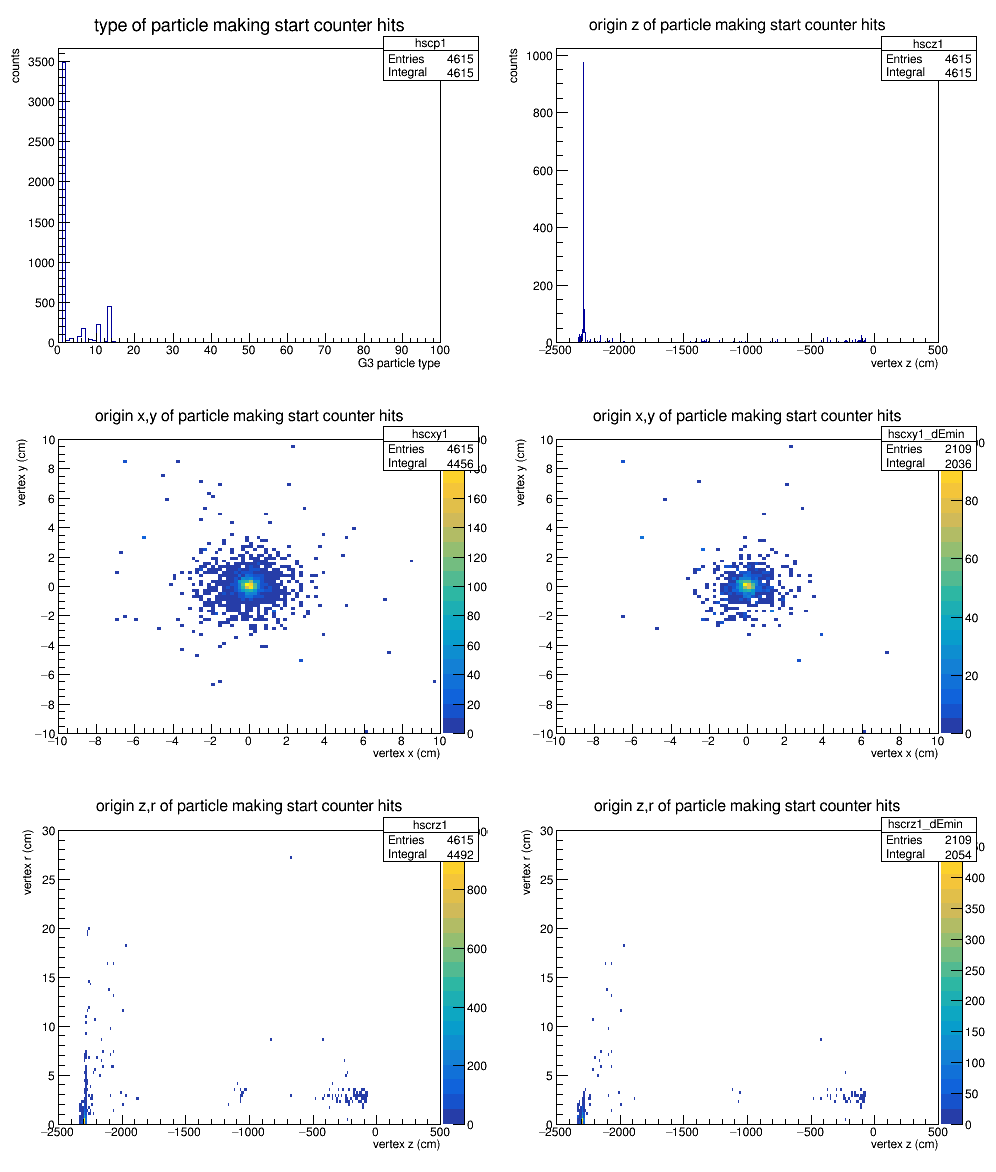

In [8]:
#hviews["sc"].fill_histograms(particle_mass=particle_mass, accumsize=10)
hviews["sc"].draw([[['hscp1', 'hscp1_dEmin'], ['hscz1', 'hscz1_dEmin']],
            [['hscxy1', ], ['hscxy1_dEmin',]],
            [['hscrz1', ], ['hscrz1_dEmin',]],
           ],
           [[['', ''], ['', '']],
            [['colz', ], ['colz',]],
            [['colz', ], ['colz',]],
           ], stats="ien")
hviews["sc"].current_canvas.cd(0)
hviews["sc"].current_canvas.Draw()

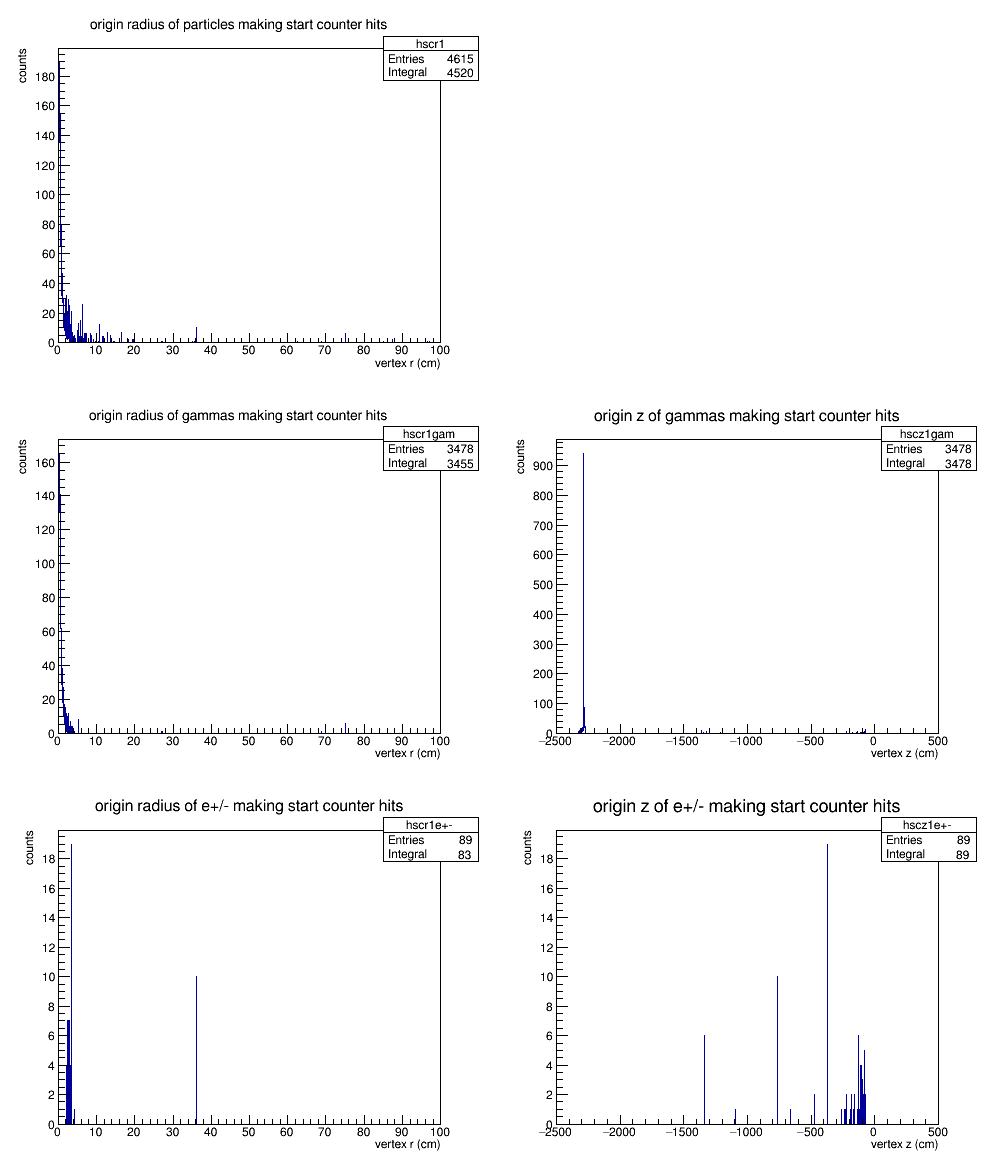

In [9]:
hviews["sc"].draw([[['hscr1', 'hscr1_dEmin'], ],
            [['hscr1gam', 'hscr1gam_dEmin'], ['hscz1gam', 'hscz1gam_dEmin']],
            [['hscr1e+-', 'hscr1e+-_dEmin'], ['hscz1e+-', 'hscz1e+-_dEmin']],
           ],
           [[['', ''], ['', '']],
            [['', ''], ['', '']],
            [['', ''], ['', '']],
           ], stats="ien")
hviews["sc"].current_canvas.cd(0)
hviews["sc"].current_canvas.Draw()

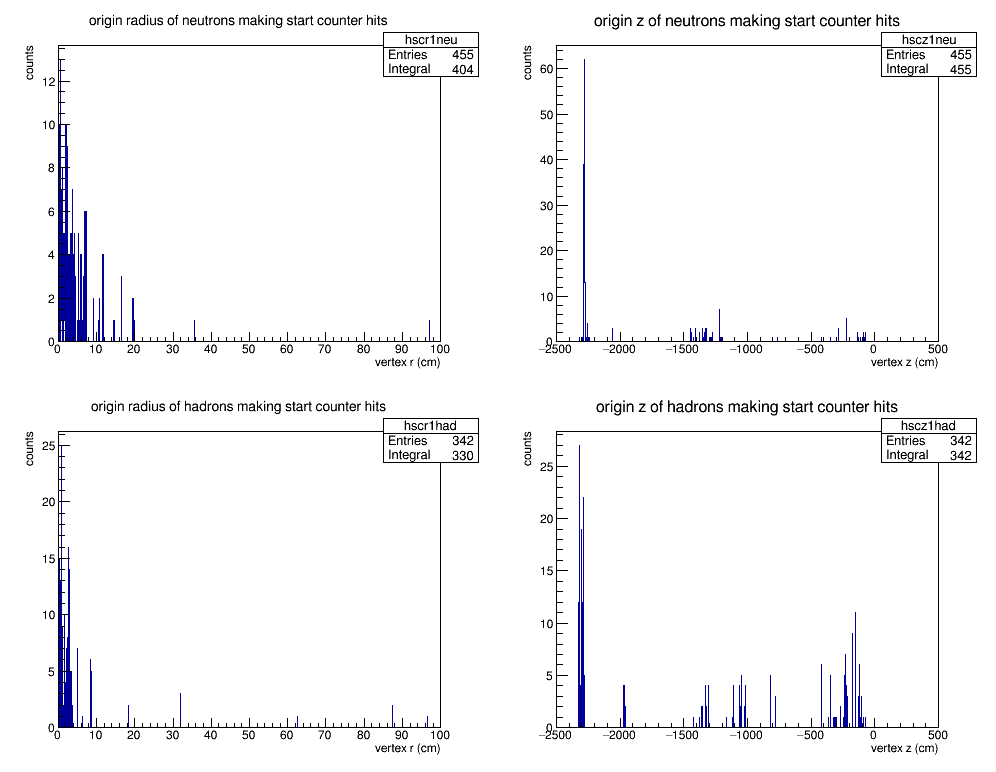

In [10]:
hviews["sc"].draw([[['hscr1neu', 'hscr1neu_dEmin'], ['hscz1neu', 'hscz1neu_dEmin']],
            [['hscr1had', 'hscr1had_dEmin'], ['hscz1had', 'hscz1had_dEmin']],
           ],
           [[['', ''], ['', '']],
            [['', ''], ['', '']],
           ], stats="ien")
hviews["sc"].current_canvas.cd(0)
hviews["sc"].current_canvas.Draw()

In [11]:
zlimits = {"end of KPT target": -2286, "end of tungsten plug": -2266,
           "end of sweep magnet": -1483, "end of alcove": -1315,
           "end of PS magnet": -1066, "entrance to target assy:": -75,
          }

## Find the maximum radius of the background sources
Follow the chain of interactions all the way from the incident beam photon at the KPT target down to the interaction in the start counter, and find the maximum distance from the beam axis that is probed by the particle chain. This can tell us where adding shielding around the beam line might have an effect on the background rate, and where it cannot.

total fraction beyond 4cm is 0.0538


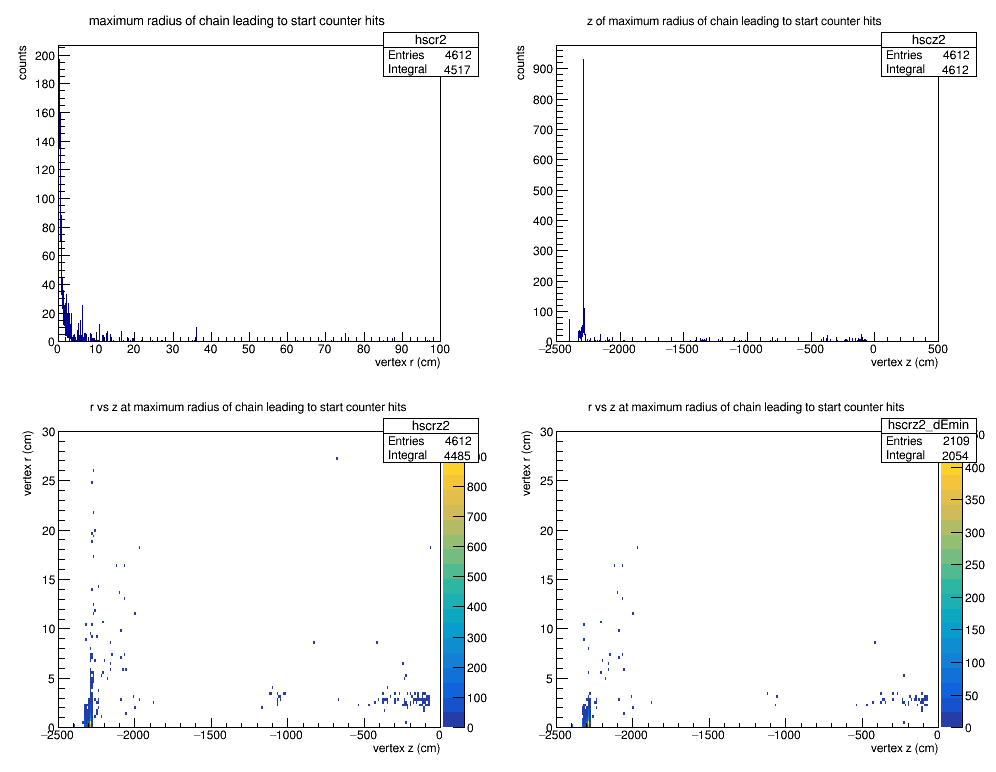

In [12]:
hviews["sc"].draw([[['hscr2', 'hscr2_dEmin'],['hscz2', 'hscz2_dEmin',]],
            [['hscrz2'], ['hscrz2_dEmin']]
           ],
           [[['', ''], ['', '']],
            [['colz'], ['colz']]
           ], stats="ien")
hviews["sc"].current_canvas.cd(0)
hviews["sc"].current_canvas.Draw()
hscr2 = hviews["sc"].get('hscr2')
print(f"total fraction beyond 4cm is {hscr2.Integral(hscr2.FindBin(4)+1, 1000) / (hscr2.Integral()+1e-99):0.3}")

## Find the intersection of the background trace at the entrance to the target
Just upstream of the liquid hydrogen target assembly there is a virtual detector plane denoted DET5 in the beamline geometry. It is shown in the above plots by a wall-to-wall and ceiling-to-floor plane in the above projection plots, located at z = -75cm. Look at the transverse distribution of the intersection of whatever particle produces a hit in the start counter, either by interacting in the start counter itself later on after passing through DET5, or by producing secdondaries that eventually generate a hit in the start counter.

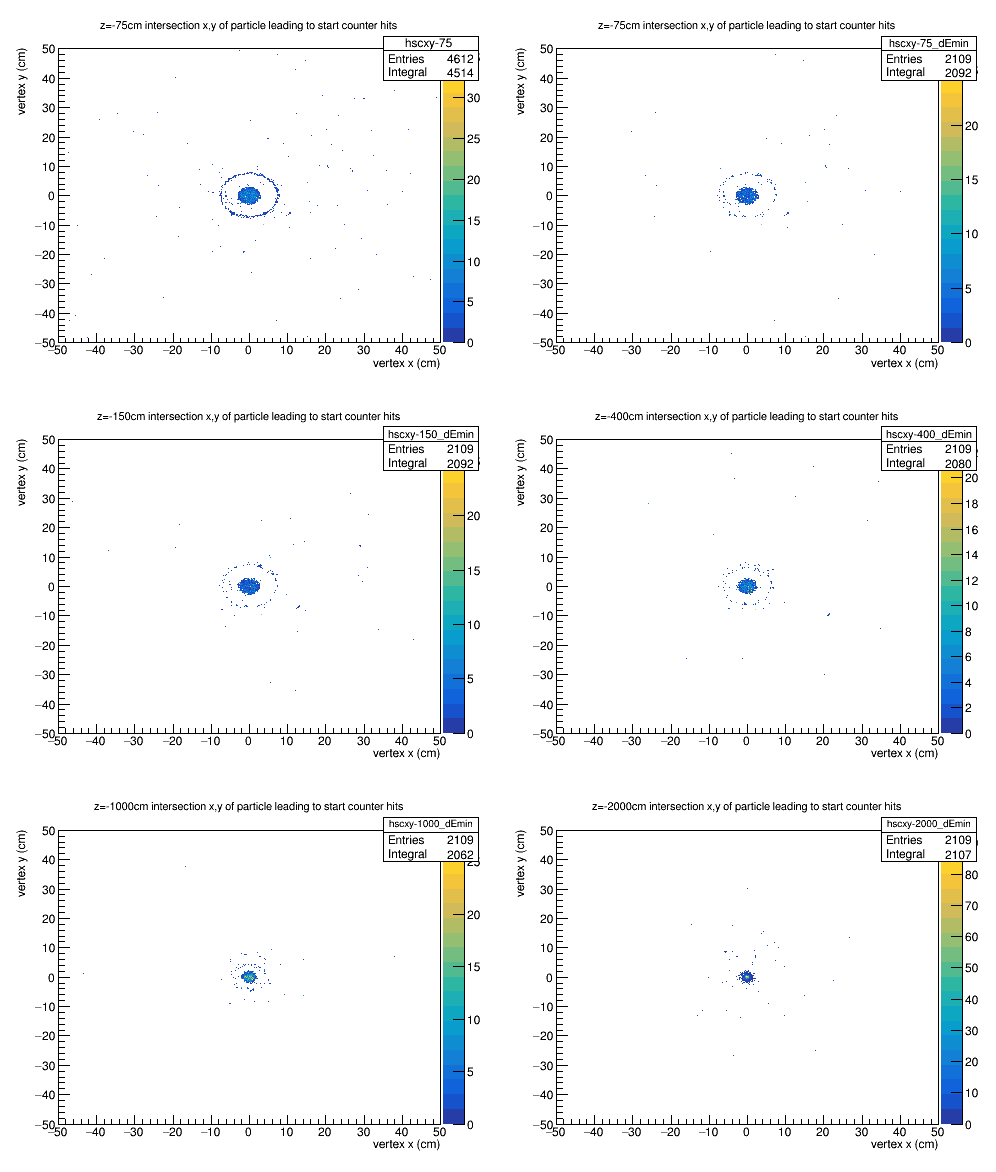

In [13]:
hviews["sc"].draw([[['hscxy-75'], ['hscxy-75_dEmin']],
                   [['hscxy-150_dEmin'], ['hscxy-400_dEmin']],
                   [['hscxy-1000_dEmin'], ['hscxy-2000_dEmin']],
                  ],
                  [[['colz'], ['colz']],
                   [['colz'], ['colz']],
                   [['colz'], ['colz']],
                  ], stats="ien")
hviews["sc"].current_canvas.cd(0)
hviews["sc"].current_canvas.Draw()

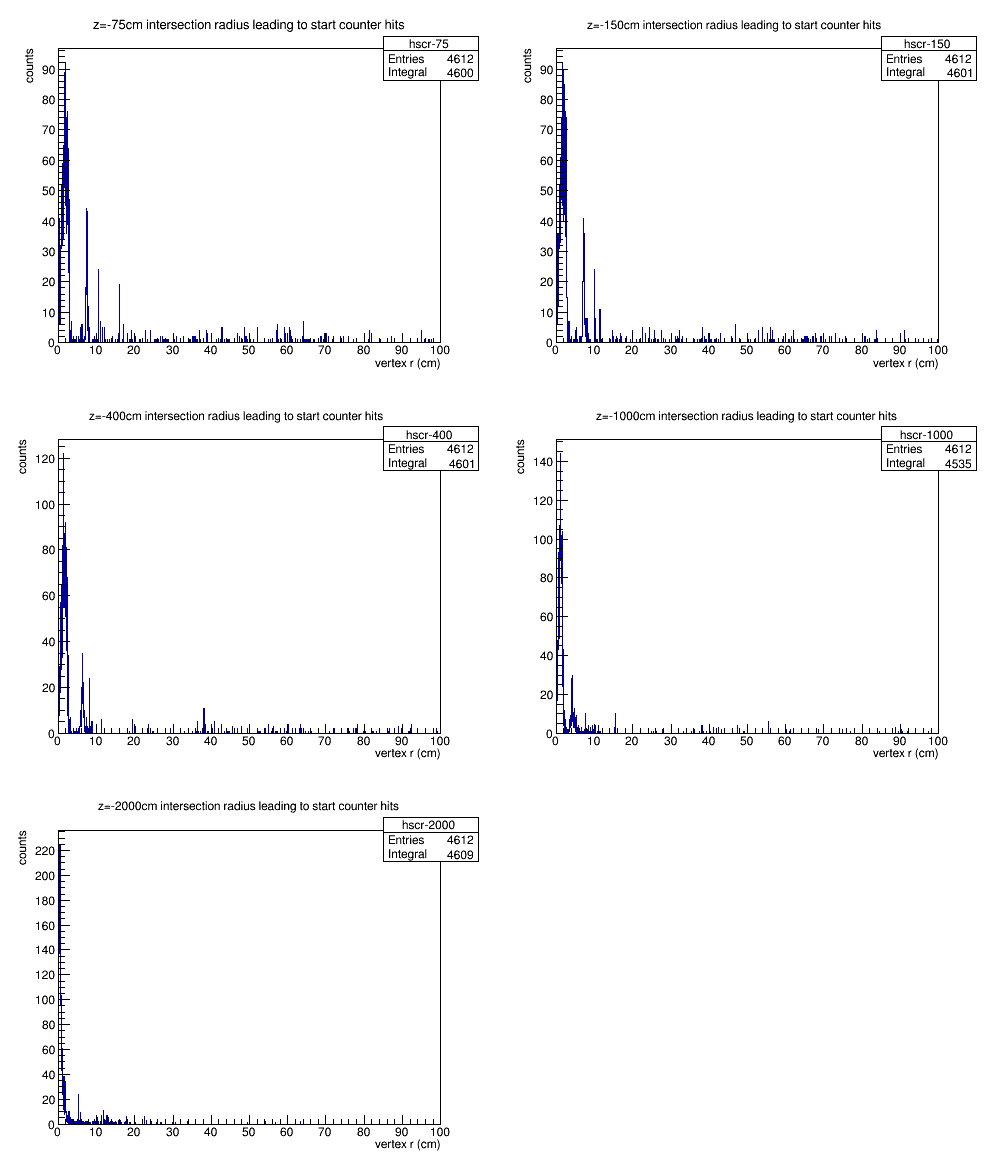

In [14]:
hviews["sc"].draw([[['hscr-75', 'hscr-75_dEmin'], ['hscr-150', 'hscr-150_dEmin']],
                   [['hscr-400', 'hscr-400_dEmin'], ['hscr-1000', 'hscr-1000_dEmin']],
                   [['hscr-2000', 'hscr-2000_dEmin'],]
                  ],
                  [[['', ''], ['', '']],
                   [['', ''], ['', '']],
                   [['', ''], ['', '']]
                  ], stats="ien")
hviews["sc"].current_canvas.cd(0)
hviews["sc"].current_canvas.Draw()

## Repeat all of the same plots for the CDC

In [15]:
def cdc_hits_hinit():
    h = {}
    h['hcdcp1'] = ROOT.TH1D("hcdcp1", "type of particle making cdc hits", 100, 0, 100)
    h['hcdcp1'].GetXaxis().SetTitle("G3 particle type")
    h['hcdcp1'].GetYaxis().SetTitle("counts")
    h['hcdcz1'] = ROOT.TH1D("hcdcz1", "origin z of particle making cdc hits", 3000, -2500, 500)
    h['hcdcz1'].GetXaxis().SetTitle("vertex z (cm)")
    h['hcdcz1'].GetYaxis().SetTitle("counts")
    h['hcdcxy1'] = ROOT.TH2D("hcdcxy1", "origin x,y of particle making cdc hits", 100, -10, 10, 100, -10, 10)
    h['hcdcxy1'].GetXaxis().SetTitle("vertex x (cm)")
    h['hcdcxy1'].GetYaxis().SetTitle("vertex y (cm)")
    h['hcdcrz1'] = ROOT.TH2D("hcdcrz1", "origin z,r of particle making cdc hits", 250, -2500, 500, 100, 0, 30)
    h['hcdcrz1'].GetXaxis().SetTitle("vertex z (cm)")
    h['hcdcrz1'].GetYaxis().SetTitle("vertex r (cm)")
    h['hcdcr1'] = ROOT.TH1D("hcdcr1", "origin radius of particles making cdc hits", 3000, 0, 100)
    h['hcdcr1'].GetXaxis().SetTitle("vertex r (cm)")
    h['hcdcr1'].GetYaxis().SetTitle("counts")
    h['hcdcr2'] = ROOT.TH1D("hcdcr2", "maximum radius of chain leading to cdc hits", 3000, 0, 100)
    h['hcdcr2'].GetXaxis().SetTitle("vertex r (cm)")
    h['hcdcr2'].GetYaxis().SetTitle("counts")
    h['hcdcz2'] = ROOT.TH1D("hcdcz2", "z of maximum radius of chain leading to cdc hits", 3000, -2500, 500)
    h['hcdcz2'].GetXaxis().SetTitle("vertex z (cm)")
    h['hcdcz2'].GetYaxis().SetTitle("counts")
    h['hcdcrz2'] = ROOT.TH2D("hcdcrz2", "r vs z at maximum radius of chain leading to cdc hits", 250, -2500, 0, 100, 0, 30)
    h['hcdcrz2'].GetXaxis().SetTitle("vertex z (cm)")
    h['hcdcrz2'].GetYaxis().SetTitle("vertex r (cm)")
    for zint in zint_planes:
        hxy = f"hcdcxy{zint}"
        hrad = f"hcdcr{zint}"
        h[hxy] = ROOT.TH2D(hxy, f"z={zint}cm intersection x,y of particle leading to cdc hits", 500, -50, 50, 500, -50, 50)
        h[hxy].GetXaxis().SetTitle("vertex x (cm)")
        h[hxy].GetYaxis().SetTitle("vertex y (cm)")
        h[hrad] = ROOT.TH1D(hrad, f"z={zint}cm intersection radius leading to cdc hits", 3000, 0, 100)
        h[hrad].GetXaxis().SetTitle("vertex r (cm)")
        h[hrad].GetYaxis().SetTitle("counts")
    h['hcdcr1gam'] = ROOT.TH1D("hcdcr1gam", "origin radius of gammas making cdc hits", 3000, 0, 100)
    h['hcdcr1gam'].GetXaxis().SetTitle("vertex r (cm)")
    h['hcdcr1gam'].GetYaxis().SetTitle("counts")
    h['hcdcr1e+-'] = ROOT.TH1D("hcdcr1e+-", "origin radius of e+/- making cdc hits", 3000, 0, 100)
    h['hcdcr1e+-'].GetXaxis().SetTitle("vertex r (cm)")
    h['hcdcr1e+-'].GetYaxis().SetTitle("counts")
    h['hcdcr1neu'] = ROOT.TH1D("hcdcr1neu", "origin radius of neutrons making cdc hits", 3000, 0, 100)
    h['hcdcr1neu'].GetXaxis().SetTitle("vertex r (cm)")
    h['hcdcr1neu'].GetYaxis().SetTitle("counts")
    h['hcdcr1had'] = ROOT.TH1D("hcdcr1had", "origin radius of hadrons making cdc hits", 3000, 0, 100)
    h['hcdcr1had'].GetXaxis().SetTitle("vertex r (cm)")
    h['hcdcr1had'].GetYaxis().SetTitle("counts")
    h['hcdcz1gam'] = ROOT.TH1D("hcdcz1gam", "origin z of gammas making cdc hits", 3000, -2500, 500)
    h['hcdcz1gam'].GetXaxis().SetTitle("vertex z (cm)")
    h['hcdcz1gam'].GetYaxis().SetTitle("counts")
    h['hcdcz1e+-'] = ROOT.TH1D("hcdcz1e+-", "origin z of e+/- making cdc hits", 3000, -2500, 500)
    h['hcdcz1e+-'].GetXaxis().SetTitle("vertex z (cm)")
    h['hcdcz1e+-'].GetYaxis().SetTitle("counts")
    h['hcdcz1neu'] = ROOT.TH1D("hcdcz1neu", "origin z of neutrons making cdc hits", 3000, -2500, 500)
    h['hcdcz1neu'].GetXaxis().SetTitle("vertex z (cm)")
    h['hcdcz1neu'].GetYaxis().SetTitle("counts")
    h['hcdcz1had'] = ROOT.TH1D("hcdcz1had", "origin z of hadrons making cdc hits", 3000, -2500, 500)
    h['hcdcz1had'].GetXaxis().SetTitle("vertex z (cm)")
    h['hcdcz1had'].GetYaxis().SetTitle("counts")
    hclones = {}
    for hname in h:
        hname2 = hname + "_dEmin"
        hclones[hname2] = h[hname].Clone(hname2)
        hclones[hname2].SetLineColor(ROOT.kOrange + 7)
    h.update(hclones)
    return h

def cdc_hits_hfill(record, histos, z5=-75):
    for pev in record.getPhysicsEvents():
        run = pev.runNo
    for pnt in record.getCdcTruthPoints():
        x1,y1,z1 = (pnt.r * np.cos(pnt.phi), pnt.r * np.sin(pnt.phi), pnt.z)
        r2max,zmax = 0,0
        torigins = pnt.getTrackOrigins()
        crossed = {zint: False for zint in zint_planes}
        for torigin in torigins:
            if torigins[-1].z > -300:
                x0,y0,z0 = (torigin.x, torigin.y*10, torigin.z*10)
            else:
                x0,y0,z0 = (torigin.x, torigin.y, torigin.z)
            if z0 < z5 and not crossed[z5]:
                histos['hcdcp1'].Fill(torigin.ptype)
                histos['hcdcz1'].Fill(z0)
                histos['hcdcxy1'].Fill(x0,y0)
                histos['hcdcr1'].Fill((x0**2 + y0**2)**0.5)
                histos['hcdcrz1'].Fill(z0, (x0**2 + y0**2)**0.5)
                if torigin.ptype == 1:
                    histos['hcdcr1gam'].Fill((x0**2 + y0**2)**0.5)
                    histos['hcdcz1gam'].Fill(z0)
                elif torigin.ptype == 2 or torigin.ptype == 3:
                    histos['hcdcr1e+-'].Fill((x0**2 + y0**2)**0.5)
                    histos['hcdcz1e+-'].Fill(z0)
                elif torigin.ptype == 13:
                    histos['hcdcr1neu'].Fill((x0**2 + y0**2)**0.5)
                    histos['hcdcz1neu'].Fill(z0)
                elif torigin.ptype > 7:
                    histos['hcdcr1had'].Fill((x0**2 + y0**2)**0.5)
                    histos['hcdcz1had'].Fill(z0)
            for zint in zint_planes:
                if z0 < zint and not crossed[zint]:
                    crossed[zint] = True
                    xint = x0 + (x1 - x0) * (zint - z0)/(z1 - z0)
                    yint = y0 + (y1 - y0) * (zint - z0)/(z1 - z0)
                    histos[f'hcdcxy{zint}'].Fill(xint,yint)
                    histos[f'hcdcr{zint}'].Fill((xint**2 + yint**2)**0.5)
            if crossed[z5] and x0**2 + y0**2 > r2max:
                r2max = x0**2 + y0**2
                zmax = z0
            x1,y1,z1 = (x0,y0,z0)
        if r2max > 0:
            histos['hcdcr2'].Fill(r2max**0.5)
            histos['hcdcz2'].Fill(zmax)
            histos['hcdcrz2'].Fill(zmax, r2max**0.5)
    return histos

n = hviews["cdc"].declare_histograms("central drift chamber", cdc_hits_hinit, cdc_hits_hfill)

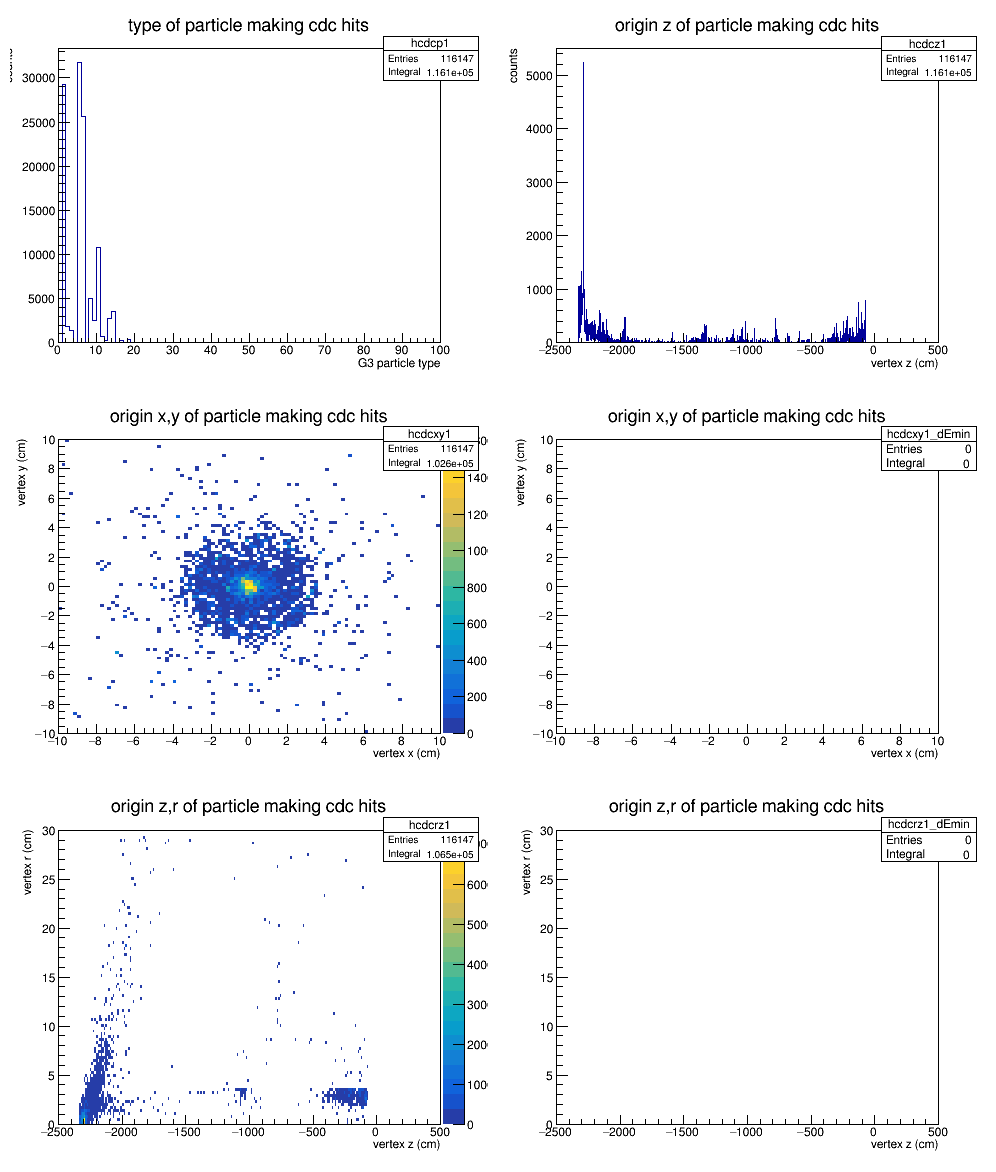

In [16]:
#hviews["cdc"].fill_histograms(particle_mass=particle_mass, accumsize=10)
hviews["cdc"].draw([[['hcdcp1', 'hcdcp1_dEmin'], ['hcdcz1', 'hcdcz1_dEmin']],
            [['hcdcxy1', ], ['hcdcxy1_dEmin',]],
            [['hcdcrz1', ], ['hcdcrz1_dEmin',]],
           ],
           [[['', ''], ['', '']],
            [['colz', ], ['colz',]],
            [['colz', ], ['colz',]],
           ], stats="ien")
hviews["cdc"].current_canvas.cd(0)
hviews["cdc"].current_canvas.Draw()

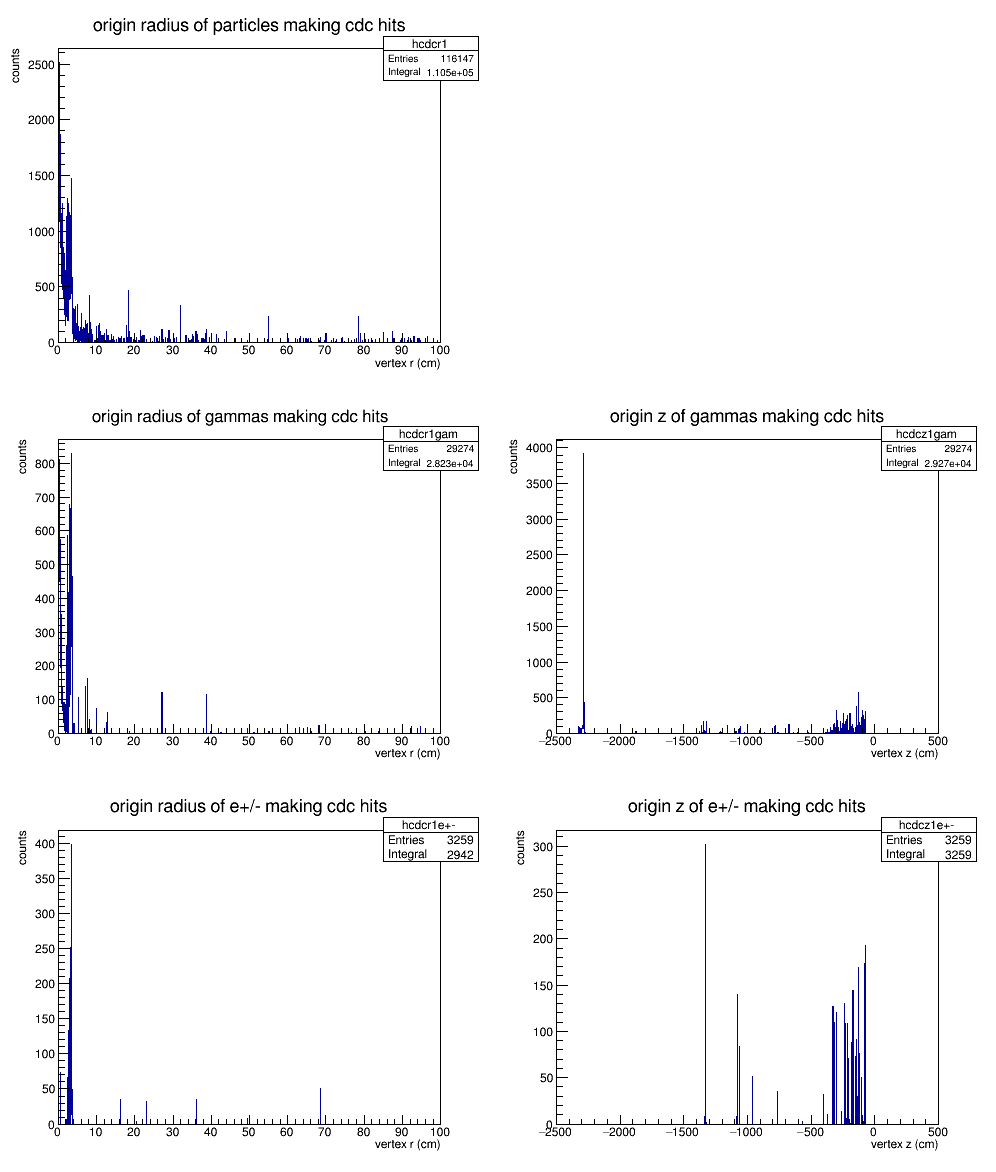

In [17]:
hviews["cdc"].draw([[['hcdcr1', 'hcdcr1_dEmin'], ],
            [['hcdcr1gam', 'hcdcr1gam_dEmin'], ['hcdcz1gam', 'hcdcz1gam_dEmin']],
            [['hcdcr1e+-', 'hcdcr1e+-_dEmin'], ['hcdcz1e+-', 'hcdcz1e+-_dEmin']],
           ],
           [[['', ''], ['', '']],
            [['', ''], ['', '']],
            [['', ''], ['', '']],
           ], stats="ien")
hviews["cdc"].current_canvas.cd(0)
hviews["cdc"].current_canvas.Draw()

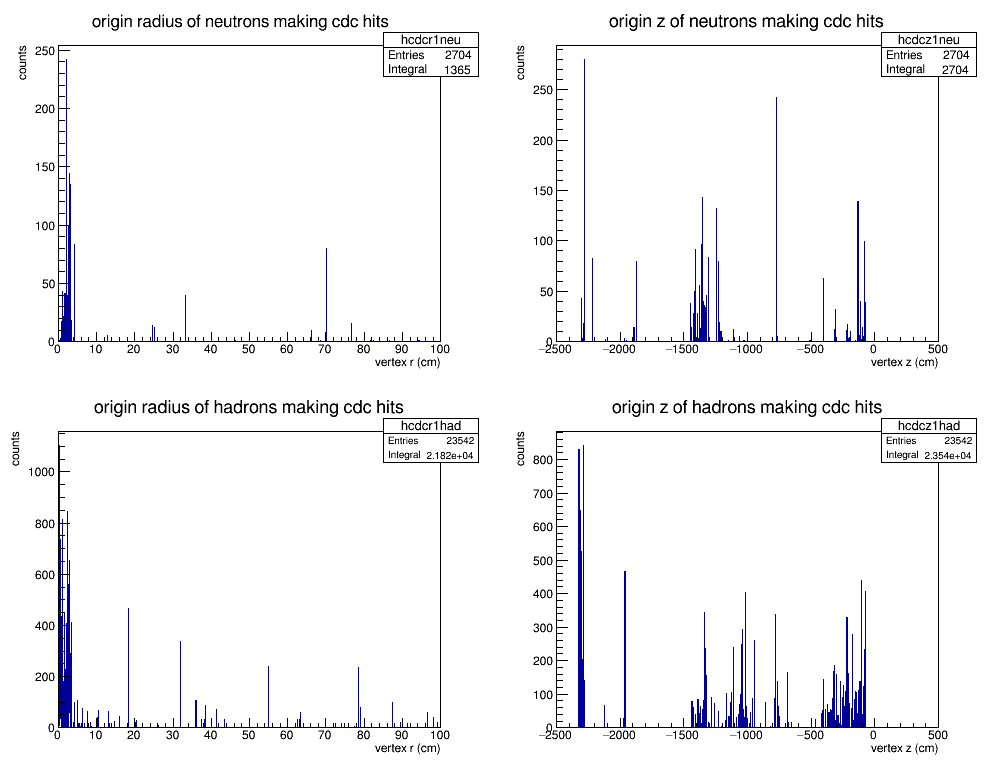

In [18]:
hviews["cdc"].draw([[['hcdcr1neu', 'hcdcr1neu_dEmin'], ['hcdcz1neu', 'hcdcz1neu_dEmin']],
            [['hcdcr1had', 'hcdcr1had_dEmin'], ['hcdcz1had', 'hscz1had_dEmin']],
           ],
           [[['', ''], ['', '']],
            [['', ''], ['', '']],
           ], stats="ien")
hviews["cdc"].current_canvas.cd(0)
hviews["cdc"].current_canvas.Draw()

total fraction beyond 4cm is 0.148


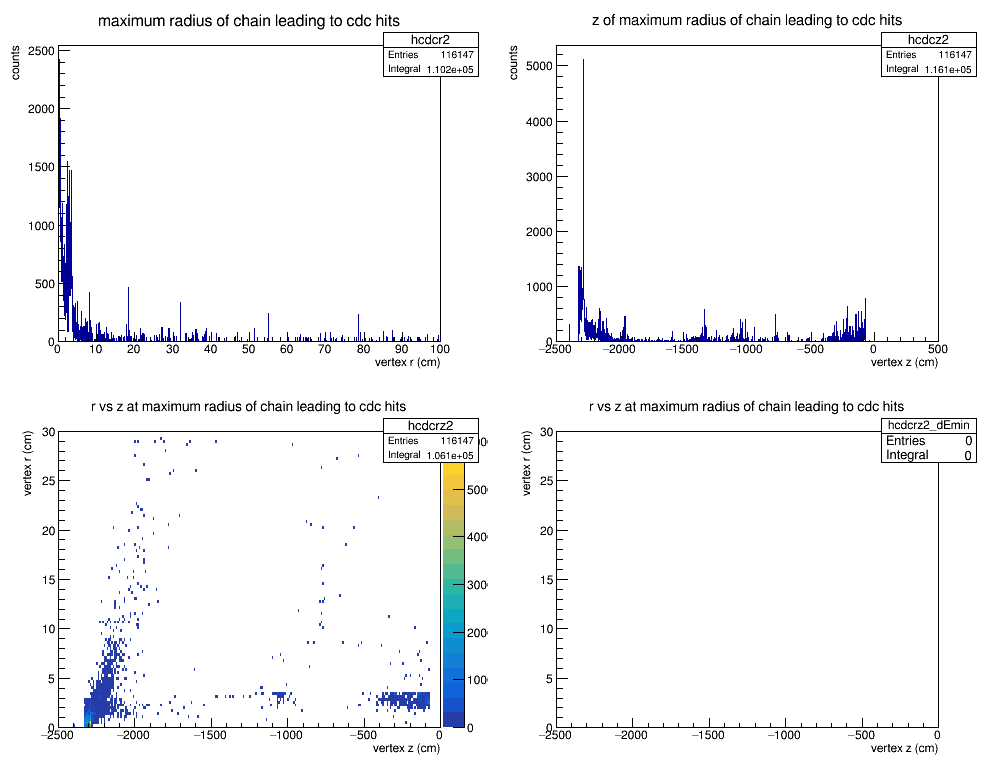

In [19]:
hviews["cdc"].draw([[['hcdcr2', 'hcdcr2_dEmin'],['hcdcz2', 'hcdcz2_dEmin',]],
            [['hcdcrz2'], ['hcdcrz2_dEmin']]
           ],
           [[['', ''], ['', '']],
            [['colz'], ['colz']]
           ], stats="ien")
hviews["cdc"].current_canvas.cd(0)
hviews["cdc"].current_canvas.Draw()
hcdcr2 = hviews["cdc"].get('hcdcr2')
print(f"total fraction beyond 4cm is {hcdcr2.Integral(hcdcr2.FindBin(4)+1, 1000) / (hcdcr2.Integral()+1e-99):0.3}")

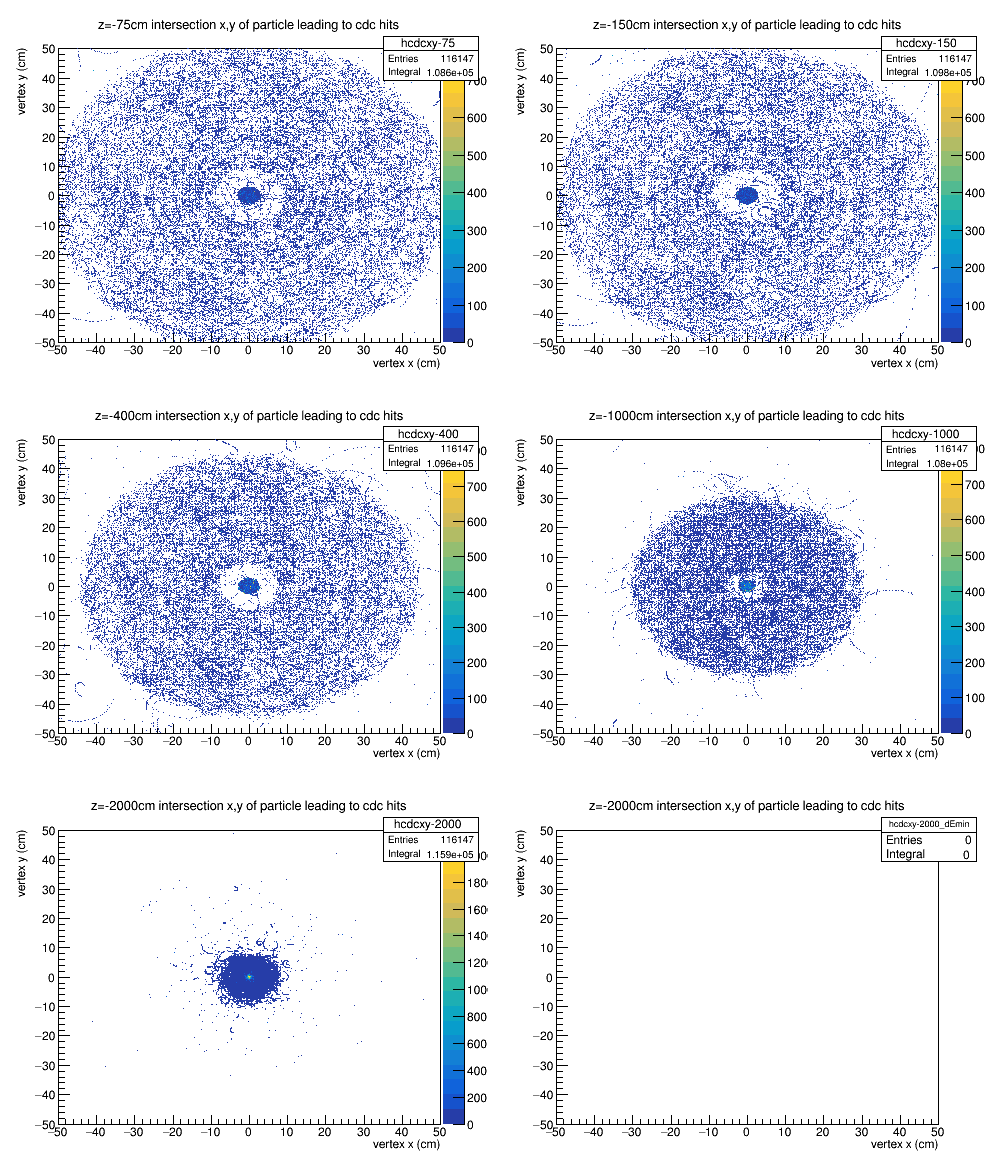

In [20]:
hviews["cdc"].draw([[['hcdcxy-75'], ['hcdcxy-150']],
            [['hcdcxy-400'], ['hcdcxy-1000']],
            [['hcdcxy-2000'], ['hcdcxy-2000_dEmin']],
           ],
           [[['colz'], ['colz']],
            [['colz'], ['colz']],
            [['colz'], ['colz']],
           ], stats="ien")
hviews["cdc"].current_canvas.cd(0)
hviews["cdc"].current_canvas.Draw()

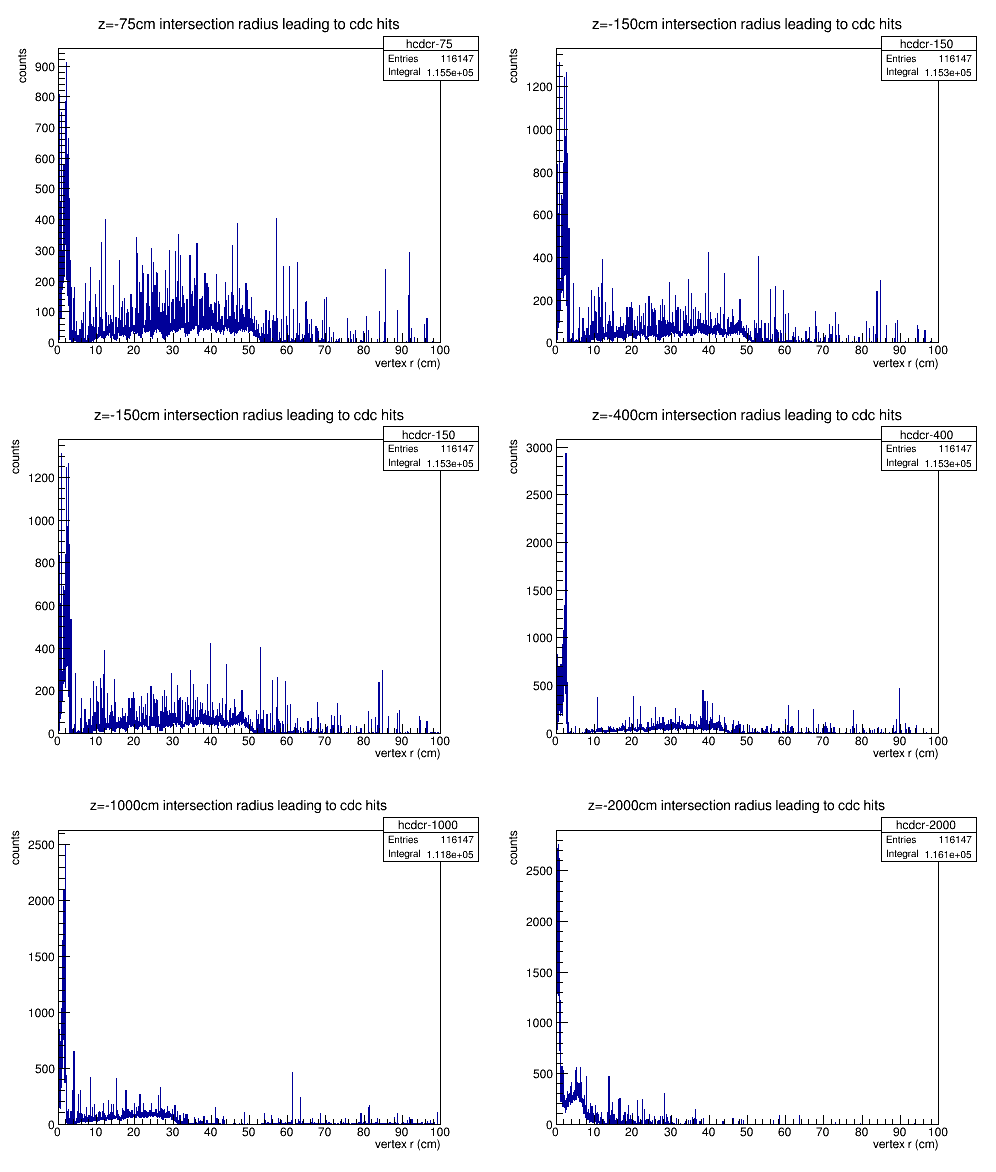

In [21]:
hviews["cdc"].draw([[['hcdcr-75', 'hcdcr-75_dEmin'], ['hcdcr-150', 'hcdcr-150_dEmin']],
                    [['hcdcr-150', 'hcdcr-150_dEmin'], ['hcdcr-400', 'hcdcr-400_dEmin']],
                    [['hcdcr-1000', 'hcdcr-1000_dEmin'], ['hcdcr-2000', 'hcdcr-2000_dEmin']]
                   ],
                   [[['', ''], ['', '']],
                    [['', ''], ['', '']],
                    [['', ''], ['', '']],
                   ], stats="ien")
hviews["cdc"].current_canvas.cd(0)
hviews["cdc"].current_canvas.Draw()

In [22]:
def fdc_hits_hinit():
    h = {}
    h['hfdcp1'] = ROOT.TH1D("hfdcp1", "type of particle making fdc hits", 100, 0, 100)
    h['hfdcp1'].GetXaxis().SetTitle("G3 particle type")
    h['hfdcp1'].GetYaxis().SetTitle("counts")
    h['hfdcz1'] = ROOT.TH1D("hfdcz1", "origin z of particle making fdc hits", 3000, -2500, 500)
    h['hfdcz1'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfdcz1'].GetYaxis().SetTitle("counts")
    h['hfdcxy1'] = ROOT.TH2D("hfdcxy1", "origin x,y of particle making fdc hits", 100, -10, 10, 100, -10, 10)
    h['hfdcxy1'].GetXaxis().SetTitle("vertex x (cm)")
    h['hfdcxy1'].GetYaxis().SetTitle("vertex y (cm)")
    h['hfdcrz1'] = ROOT.TH2D("hfdcrz1", "origin z,r of particle making fdc hits", 250, -2500, 500, 100, 0, 30)
    h['hfdcrz1'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfdcrz1'].GetYaxis().SetTitle("vertex r (cm)")
    h['hfdcr1'] = ROOT.TH1D("hfdcr1", "origin radius of particles making fdc hits", 3000, 0, 100)
    h['hfdcr1'].GetXaxis().SetTitle("vertex r (cm)")
    h['hfdcr1'].GetYaxis().SetTitle("counts")
    h['hfdcr2'] = ROOT.TH1D("hfdcr2", "maximum radius of chain leading to fdc hits", 3000, 0, 100)
    h['hfdcr2'].GetXaxis().SetTitle("vertex r (cm)")
    h['hfdcr2'].GetYaxis().SetTitle("counts")
    h['hfdcz2'] = ROOT.TH1D("hfdcz2", "z of maximum radius of chain leading to fdc hits", 3000, -2500, 500)
    h['hfdcz2'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfdcz2'].GetYaxis().SetTitle("counts")
    h['hfdcrz2'] = ROOT.TH2D("hfdcrz2", "r vs z at maximum radius of chain leading to fdc hits", 250, -2500, 0, 100, 0, 30)
    h['hfdcrz2'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfdcrz2'].GetYaxis().SetTitle("vertex r (cm)")
    for zint in zint_planes:
        hxy = f"hfdcxy{zint}"
        hrad = f"hfdcr{zint}"
        h[hxy] = ROOT.TH2D(hxy, f"z={zint}cm intersection x,y of particle leading to fdc hits", 500, -50, 50, 500, -50, 50)
        h[hxy].GetXaxis().SetTitle("vertex x (cm)")
        h[hxy].GetYaxis().SetTitle("vertex y (cm)")
        h[hrad] = ROOT.TH1D(hrad, f"z={zint}cm intersection radius leading to fdc hits", 3000, 0, 100)
        h[hrad].GetXaxis().SetTitle("vertex r (cm)")
        h[hrad].GetYaxis().SetTitle("counts")
    h['hfdcr1gam'] = ROOT.TH1D("hfdcr1gam", "origin radius of gammas making fdc hits", 3000, 0, 100)
    h['hfdcr1gam'].GetXaxis().SetTitle("vertex r (cm)")
    h['hfdcr1gam'].GetYaxis().SetTitle("counts")
    h['hfdcr1e+-'] = ROOT.TH1D("hfdcr1e+-", "origin radius of e+/- making fdc hits", 3000, 0, 100)
    h['hfdcr1e+-'].GetXaxis().SetTitle("vertex r (cm)")
    h['hfdcr1e+-'].GetYaxis().SetTitle("counts")
    h['hfdcr1neu'] = ROOT.TH1D("hfdcr1neu", "origin radius of neutrons making fdc hits", 3000, 0, 100)
    h['hfdcr1neu'].GetXaxis().SetTitle("vertex r (cm)")
    h['hfdcr1neu'].GetYaxis().SetTitle("counts")
    h['hfdcr1had'] = ROOT.TH1D("hfdcr1had", "origin radius of hadrons making fdc hits", 3000, 0, 100)
    h['hfdcr1had'].GetXaxis().SetTitle("vertex r (cm)")
    h['hfdcr1had'].GetYaxis().SetTitle("counts")
    h['hfdcz1gam'] = ROOT.TH1D("hfdcz1gam", "origin z of gammas making fdc hits", 3000, -2500, 500)
    h['hfdcz1gam'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfdcz1gam'].GetYaxis().SetTitle("counts")
    h['hfdcz1e+-'] = ROOT.TH1D("hfdcz1e+-", "origin z of e+/- making fdc hits", 3000, -2500, 500)
    h['hfdcz1e+-'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfdcz1e+-'].GetYaxis().SetTitle("counts")
    h['hfdcz1neu'] = ROOT.TH1D("hfdcz1neu", "origin z of neutrons making fdc hits", 3000, -2500, 500)
    h['hfdcz1neu'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfdcz1neu'].GetYaxis().SetTitle("counts")
    h['hfdcz1had'] = ROOT.TH1D("hfdcz1had", "origin z of hadrons making fdc hits", 3000, -2500, 500)
    h['hfdcz1had'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfdcz1had'].GetYaxis().SetTitle("counts")
    hclones = {}
    for hname in h:
        hname2 = hname + "_dEmin"
        hclones[hname2] = h[hname].Clone(hname2)
        hclones[hname2].SetLineColor(ROOT.kOrange + 7)
    h.update(hclones)
    return h

def fdc_hits_hfill(record, histos, z5=-75):
    for pev in record.getPhysicsEvents():
        run = pev.runNo
    for pnt in record.getFdcTruthPoints():
        x1,y1,z1 = (pnt.x, pnt.y, pnt.z)
        r2max,zmax = 0,0
        torigins = pnt.getTrackOrigins()
        crossed = {zint: False for zint in zint_planes}
        for torigin in torigins:
            if torigins[-1].z > -300:
                x0,y0,z0 = (torigin.x, torigin.y*10, torigin.z*10)
            else:
                x0,y0,z0 = (torigin.x, torigin.y, torigin.z)
            if z0 < z5 and not crossed[z5]:
                histos['hfdcp1'].Fill(torigin.ptype)
                histos['hfdcz1'].Fill(z0)
                histos['hfdcxy1'].Fill(x0,y0)
                histos['hfdcr1'].Fill((x0**2 + y0**2)**0.5)
                histos['hfdcrz1'].Fill(z0, (x0**2 + y0**2)**0.5)
                if torigin.ptype == 1:
                    histos['hfdcr1gam'].Fill((x0**2 + y0**2)**0.5)
                    histos['hfdcz1gam'].Fill(z0)
                elif torigin.ptype == 2 or torigin.ptype == 3:
                    histos['hfdcr1e+-'].Fill((x0**2 + y0**2)**0.5)
                    histos['hfdcz1e+-'].Fill(z0)
                elif torigin.ptype == 13:
                    histos['hfdcr1neu'].Fill((x0**2 + y0**2)**0.5)
                    histos['hfdcz1neu'].Fill(z0)
                elif torigin.ptype > 7:
                    histos['hfdcr1had'].Fill((x0**2 + y0**2)**0.5)
                    histos['hfdcz1had'].Fill(z0)
            for zint in zint_planes:
                if z0 < zint and not crossed[zint]:
                    crossed[zint] = True
                    xint = x0 + (x1 - x0) * (zint - z0)/(z1 - z0)
                    yint = y0 + (y1 - y0) * (zint - z0)/(z1 - z0)
                    histos[f'hfdcxy{zint}'].Fill(xint,yint)
                    histos[f'hfdcr{zint}'].Fill((xint**2 + yint**2)**0.5)
            if crossed[z5] and x0**2 + y0**2 > r2max:
                r2max = x0**2 + y0**2
                zmax = z0
            x1,y1,z1 = (x0,y0,z0)
        if r2max > 0:
            histos['hfdcr2'].Fill(r2max**0.5)
            histos['hfdcz2'].Fill(zmax)
            histos['hfdcrz2'].Fill(zmax, r2max**0.5)
    return histos

n = hviews["fdc"].declare_histograms("forward drift chamber", fdc_hits_hinit, fdc_hits_hfill)

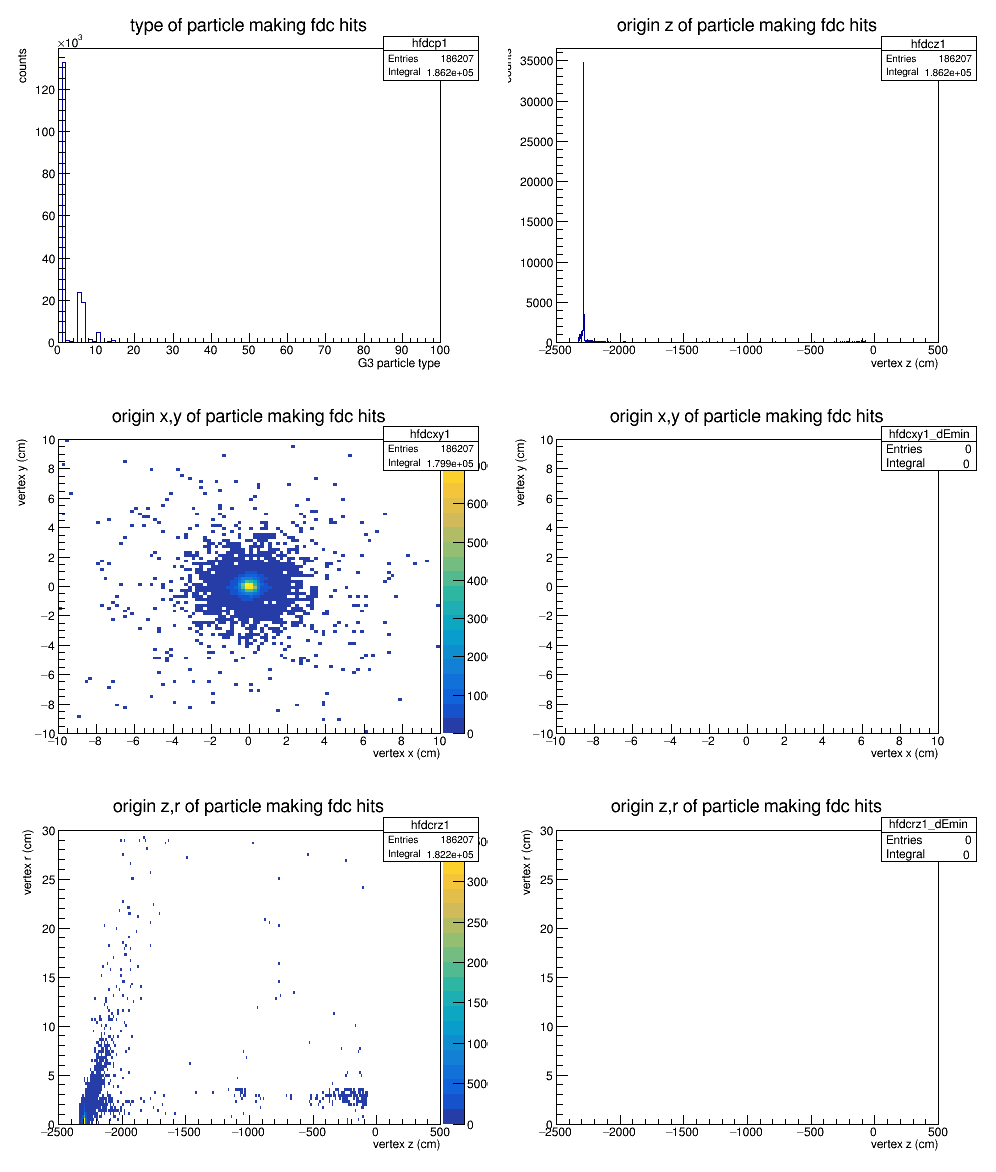

In [23]:
#hviews["fdc"].fill_histograms(particle_mass=particle_mass, accumsize=10)
hviews["fdc"].draw([[['hfdcp1', 'hfdcp1_dEmin'], ['hfdcz1', 'hfdcz1_dEmin']],
            [['hfdcxy1', ], ['hfdcxy1_dEmin',]],
            [['hfdcrz1', ], ['hfdcrz1_dEmin',]],
           ],
           [[['', ''], ['', '']],
            [['colz', ], ['colz',]],
            [['colz', ], ['colz',]],
           ], stats="ien")
hviews["fdc"].current_canvas.cd(0)
hviews["fdc"].current_canvas.Draw()

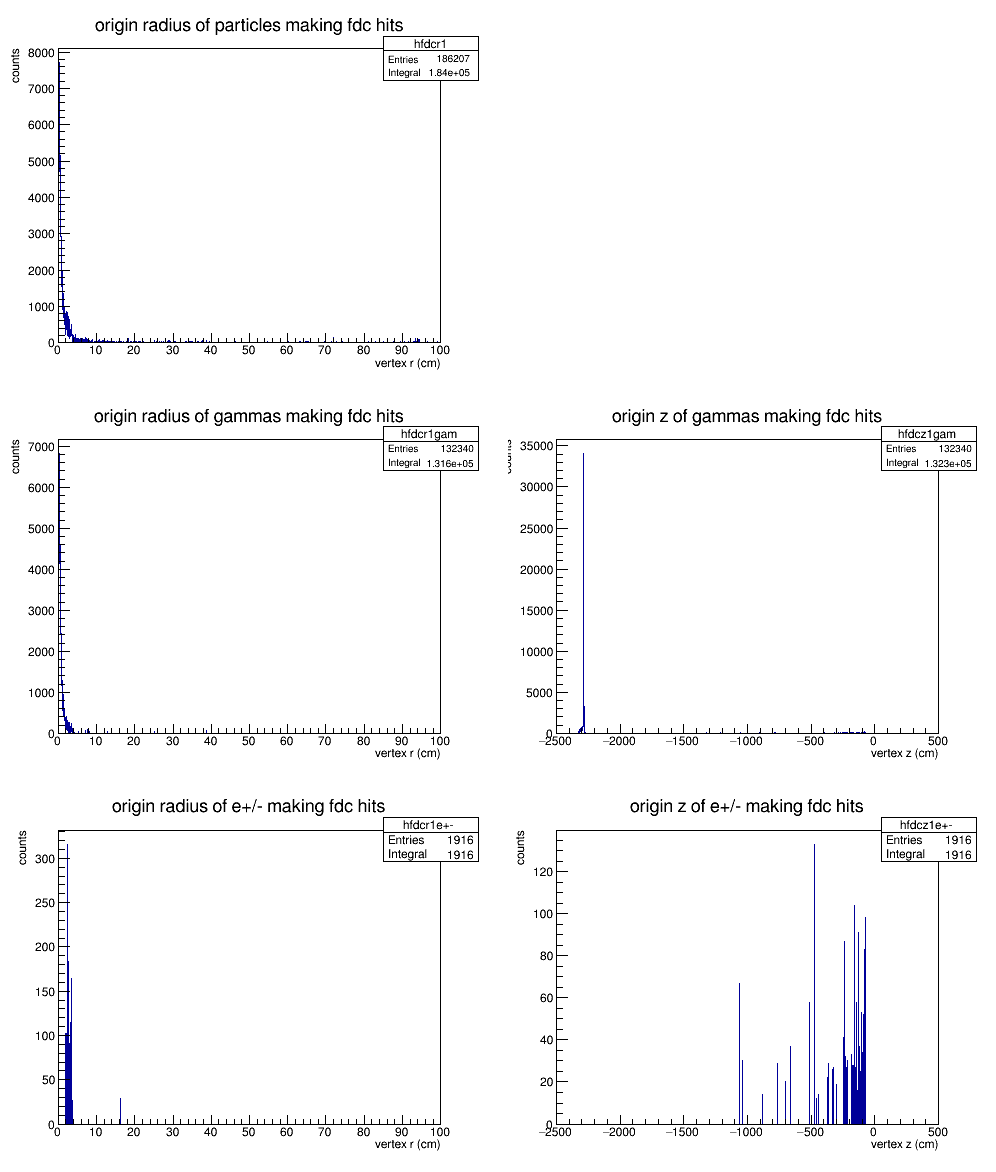

In [24]:
hviews["fdc"].draw([[['hfdcr1', 'hfdcr1_dEmin'], ],
            [['hfdcr1gam', 'hfdcr1gam_dEmin'], ['hfdcz1gam', 'hfdcz1gam_dEmin']],
            [['hfdcr1e+-', 'hfdcr1e+-_dEmin'], ['hfdcz1e+-', 'hfdcz1e+-_dEmin']],
           ],
           [[['', ''], ['', '']],
            [['', ''], ['', '']],
            [['', ''], ['', '']],
           ], stats="ien")
hviews["fdc"].current_canvas.cd(0)
hviews["fdc"].current_canvas.Draw()

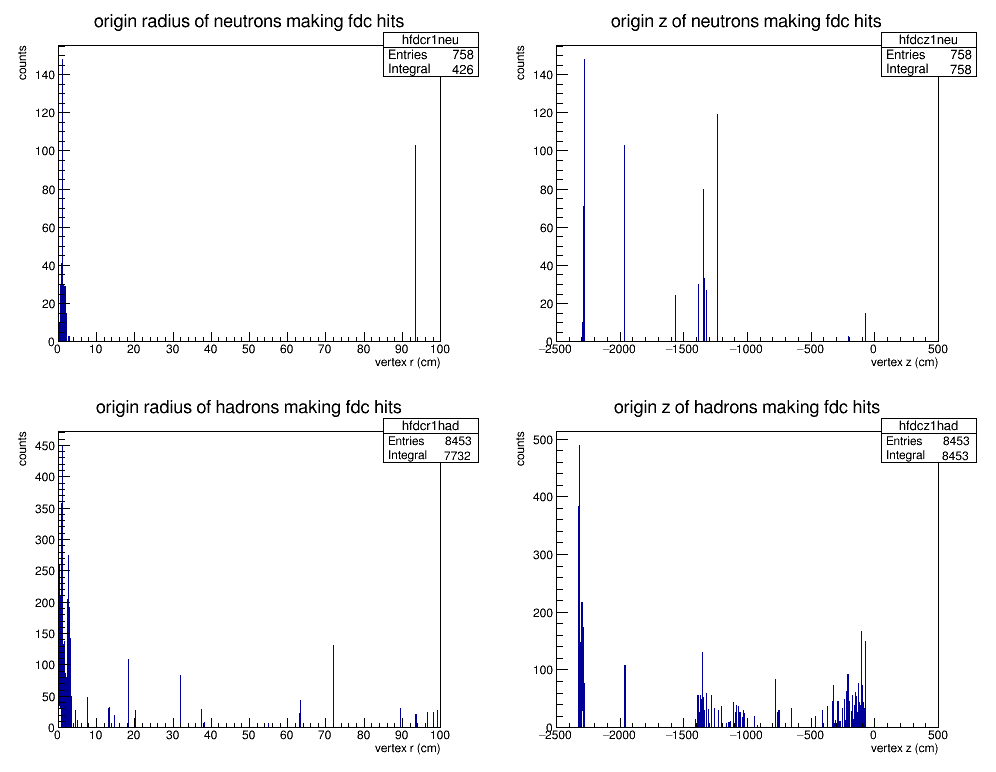

In [25]:
hviews["fdc"].draw([[['hfdcr1neu', 'hfdcr1neu_dEmin'], ['hfdcz1neu', 'hfdcz1neu_dEmin']],
            [['hfdcr1had', 'hfdcr1had_dEmin'], ['hfdcz1had', 'hscz1had_dEmin']],
           ],
           [[['', ''], ['', '']],
            [['', ''], ['', '']],
           ], stats="ien")
hviews["fdc"].current_canvas.cd(0)
hviews["fdc"].current_canvas.Draw()

total fraction beyond 4cm is 0.0556


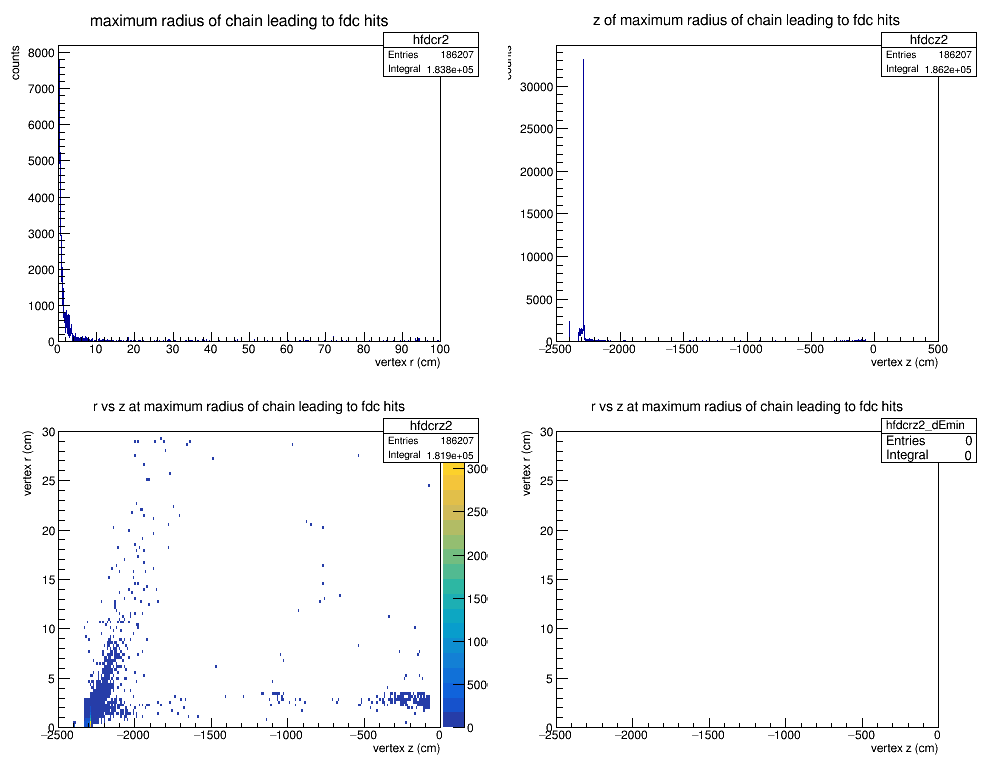

In [26]:
hviews["fdc"].draw([[['hfdcr2', 'hfdcr2_dEmin'],['hfdcz2', 'hfdcz2_dEmin',]],
            [['hfdcrz2'], ['hfdcrz2_dEmin']]
           ],
           [[['', ''], ['', '']],
            [['colz'], ['colz']]
           ], stats="ien")
hviews["fdc"].current_canvas.cd(0)
hviews["fdc"].current_canvas.Draw()
hfdcr2 = hviews["fdc"].get('hfdcr2')
print(f"total fraction beyond 4cm is {hfdcr2.Integral(hfdcr2.FindBin(4)+1, 1000) / (hfdcr2.Integral()+1e-99):0.3}")

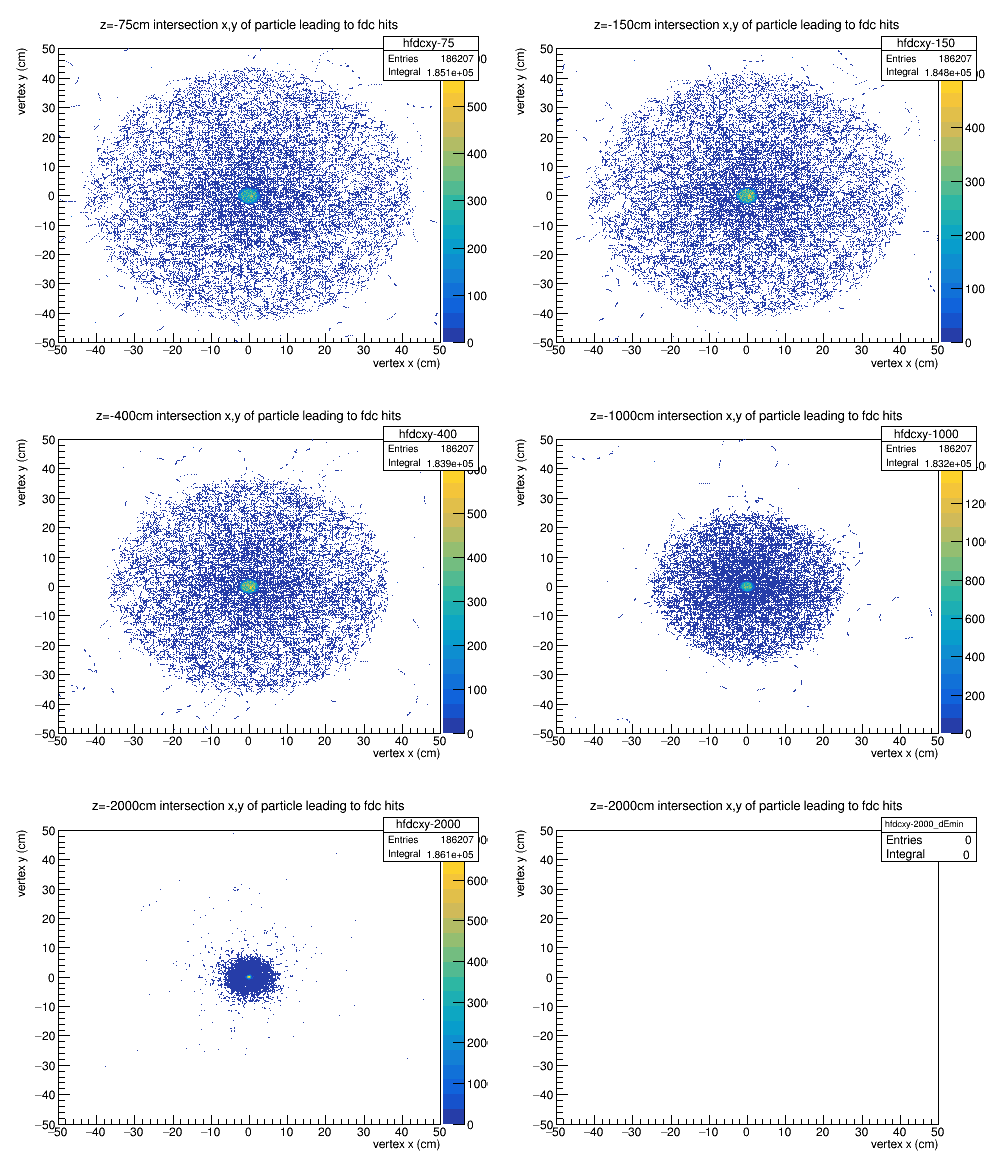

In [27]:
hviews["fdc"].draw([[['hfdcxy-75'], ['hfdcxy-150']],
                    [['hfdcxy-400'], ['hfdcxy-1000']],
                    [['hfdcxy-2000'], ['hfdcxy-2000_dEmin']],
                   ],
                   [[['colz'], ['colz']],
                    [['colz'], ['colz']],
                    [['colz'], ['colz']],
                   ], stats="ien")
hviews["fdc"].current_canvas.cd(0)
hviews["fdc"].current_canvas.Draw()

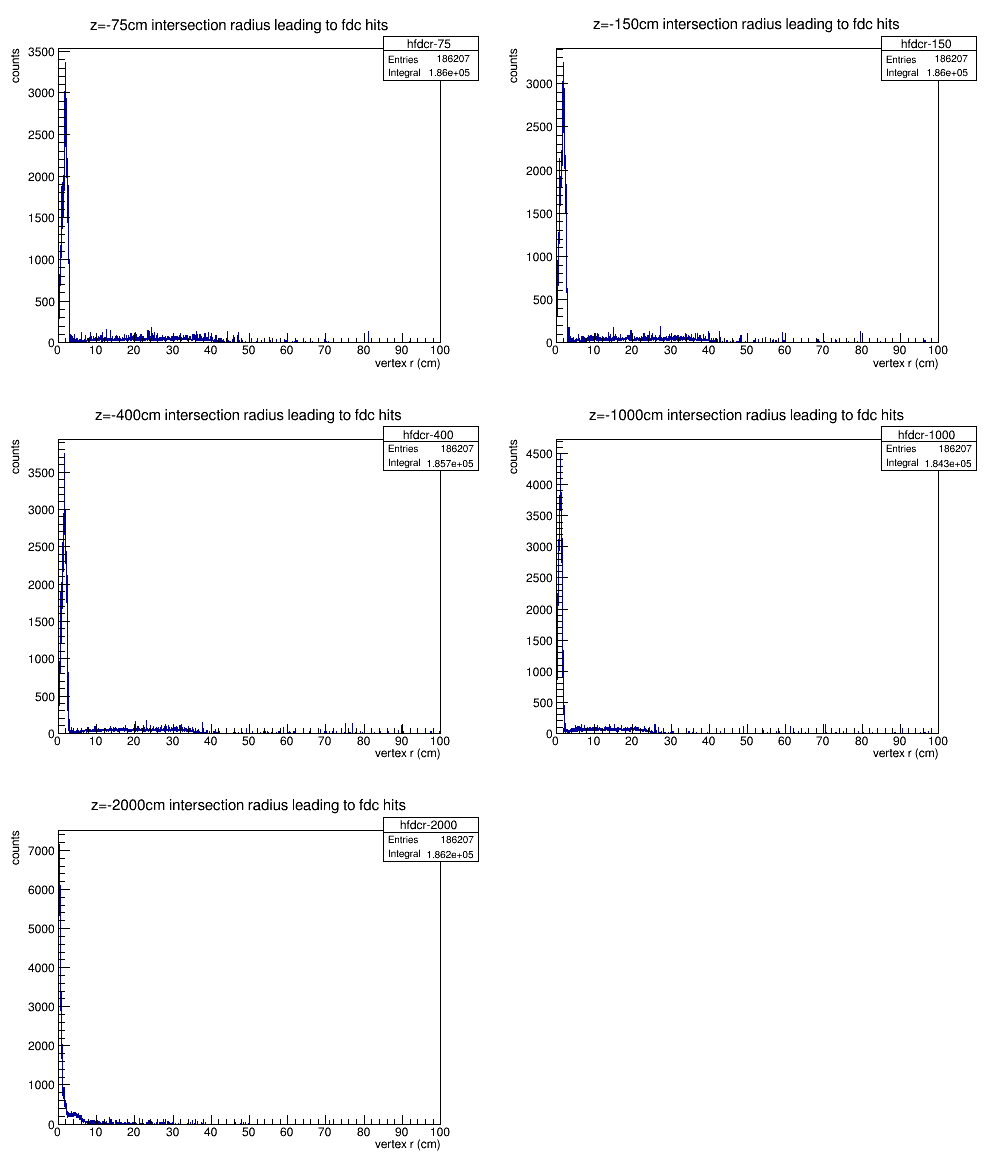

In [28]:
hviews["fdc"].draw([[['hfdcr-75', 'hfdcr-75_dEmin'], ['hfdcr-150', 'hfdcr-150_dEmin']],
                    [['hfdcr-400', 'hfdcr-400_dEmin'], ['hfdcr-1000', 'hfdcr-1000_dEmin']],
                    [['hfdcr-2000', 'hfdcr-2000_dEmin']],
                   ],
                   [[['', ''], ['', '']],
                    [['', ''], ['', '']],
                    [['', ''], ],
                   ], stats="ien")
hviews["fdc"].current_canvas.cd(0)
hviews["fdc"].current_canvas.Draw()

In [29]:
def bcal_hits_hinit():
    h = {}
    h['hbcalp1'] = ROOT.TH1D("hbcalp1", "type of particle making bcal hits", 100, 0, 100)
    h['hbcalp1'].GetXaxis().SetTitle("G3 particle type")
    h['hbcalp1'].GetYaxis().SetTitle("counts")
    h['hbcalz1'] = ROOT.TH1D("hbcalz1", "origin z of particle making bcal hits", 3000, -2500, 500)
    h['hbcalz1'].GetXaxis().SetTitle("vertex z (cm)")
    h['hbcalz1'].GetYaxis().SetTitle("counts")
    h['hbcalxy1'] = ROOT.TH2D("hbcalxy1", "origin x,y of particle making bcal hits", 100, -10, 10, 100, -10, 10)
    h['hbcalxy1'].GetXaxis().SetTitle("vertex x (cm)")
    h['hbcalxy1'].GetYaxis().SetTitle("vertex y (cm)")
    h['hbcalrz1'] = ROOT.TH2D("hbcalrz1", "origin z,r of particle making bcal hits", 250, -2500, 500, 100, 0, 30)
    h['hbcalrz1'].GetXaxis().SetTitle("vertex z (cm)")
    h['hbcalrz1'].GetYaxis().SetTitle("vertex r (cm)")
    h['hbcalr1'] = ROOT.TH1D("hbcalr1", "origin radius of particles making bcal hits", 3000, 0, 100)
    h['hbcalr1'].GetXaxis().SetTitle("vertex r (cm)")
    h['hbcalr1'].GetYaxis().SetTitle("counts")
    h['hbcalr2'] = ROOT.TH1D("hbcalr2", "maximum radius of chain leading to bcal hits", 3000, 0, 100)
    h['hbcalr2'].GetXaxis().SetTitle("vertex r (cm)")
    h['hbcalr2'].GetYaxis().SetTitle("counts")
    h['hbcalz2'] = ROOT.TH1D("hbcalz2", "z of maximum radius of chain leading to bcal hits", 3000, -2500, 500)
    h['hbcalz2'].GetXaxis().SetTitle("vertex z (cm)")
    h['hbcalz2'].GetYaxis().SetTitle("counts")
    h['hbcalrz2'] = ROOT.TH2D("hbcalrz2", "r vs z at maximum radius of chain leading to bcal hits", 250, -2500, 0, 100, 0, 30)
    h['hbcalrz2'].GetXaxis().SetTitle("vertex z (cm)")
    h['hbcalrz2'].GetYaxis().SetTitle("vertex r (cm)")
    for zint in zint_planes:
        hxy = f"hbcalxy{zint}"
        hrad = f"hbcalr{zint}"
        h[hxy] = ROOT.TH2D(hxy, f"z={zint}cm intersection x,y of particle leading to bcal hits", 500, -50, 50, 500, -50, 50)
        h[hxy].GetXaxis().SetTitle("vertex x (cm)")
        h[hxy].GetYaxis().SetTitle("vertex y (cm)")
        h[hrad] = ROOT.TH1D(hrad, f"z={zint}cm intersection radius leading to bcal hits", 3000, 0, 100)
        h[hrad].GetXaxis().SetTitle("vertex r (cm)")
        h[hrad].GetYaxis().SetTitle("counts")
    h['hbcalr1gam'] = ROOT.TH1D("hbcalr1gam", "origin radius of gammas making bcal hits", 3000, 0, 100)
    h['hbcalr1gam'].GetXaxis().SetTitle("vertex r (cm)")
    h['hbcalr1gam'].GetYaxis().SetTitle("counts")
    h['hbcalr1e+-'] = ROOT.TH1D("hbcalr1e+-", "origin radius of e+/- making bcal hits", 3000, 0, 100)
    h['hbcalr1e+-'].GetXaxis().SetTitle("vertex r (cm)")
    h['hbcalr1e+-'].GetYaxis().SetTitle("counts")
    h['hbcalr1neu'] = ROOT.TH1D("hbcalr1neu", "origin radius of neutrons making bcal hits", 3000, 0, 100)
    h['hbcalr1neu'].GetXaxis().SetTitle("vertex r (cm)")
    h['hbcalr1neu'].GetYaxis().SetTitle("counts")
    h['hbcalr1had'] = ROOT.TH1D("hbcalr1had", "origin radius of hadrons making bcal hits", 3000, 0, 100)
    h['hbcalr1had'].GetXaxis().SetTitle("vertex r (cm)")
    h['hbcalr1had'].GetYaxis().SetTitle("counts")
    h['hbcalz1gam'] = ROOT.TH1D("hbcalz1gam", "origin z of gammas making bcal hits", 3000, -2500, 500)
    h['hbcalz1gam'].GetXaxis().SetTitle("vertex z (cm)")
    h['hbcalz1gam'].GetYaxis().SetTitle("counts")
    h['hbcalz1e+-'] = ROOT.TH1D("hbcalz1e+-", "origin z of e+/- making bcal hits", 3000, -2500, 500)
    h['hbcalz1e+-'].GetXaxis().SetTitle("vertex z (cm)")
    h['hbcalz1e+-'].GetYaxis().SetTitle("counts")
    h['hbcalz1neu'] = ROOT.TH1D("hbcalz1neu", "origin z of neutrons making bcal hits", 3000, -2500, 500)
    h['hbcalz1neu'].GetXaxis().SetTitle("vertex z (cm)")
    h['hbcalz1neu'].GetYaxis().SetTitle("counts")
    h['hbcalz1had'] = ROOT.TH1D("hbcalz1had", "origin z of hadrons making bcal hits", 3000, -2500, 500)
    h['hbcalz1had'].GetXaxis().SetTitle("vertex z (cm)")
    h['hbcalz1had'].GetYaxis().SetTitle("counts")
    hclones = {}
    for hname in h:
        hname2 = hname + "_dEmin"
        hclones[hname2] = h[hname].Clone(hname2)
        hclones[hname2].SetLineColor(ROOT.kOrange + 7)
    h.update(hclones)
    return h

def bcal_hits_hfill(record, histos, dEmin=0.01, z5=-75):
    for pev in record.getPhysicsEvents():
        run = pev.runNo
    for pnt in record.getBcalTruthShowers():
        x1,y1,z1 = (pnt.r * np.cos(pnt.phi), pnt.r * np.sin(pnt.phi), pnt.z)
        r2max,zmax = 0,0
        torigins = pnt.getTrackOrigins()
        crossed = {zint: False for zint in zint_planes}
        for torigin in torigins:
            if torigins[-1].z > -300:
                x0,y0,z0 = (torigin.x, torigin.y*10, torigin.z*10)
            else:
                x0,y0,z0 = (torigin.x, torigin.y, torigin.z)
            if z0 < z5 and not crossed[z5]:
                histos['hbcalp1'].Fill(torigin.ptype)
                histos['hbcalz1'].Fill(z0)
                histos['hbcalxy1'].Fill(x0,y0)
                histos['hbcalr1'].Fill((x0**2 + y0**2)**0.5)
                histos['hbcalrz1'].Fill(z0, (x0**2 + y0**2)**0.5)
                if torigin.ptype == 1:
                    histos['hbcalr1gam'].Fill((x0**2 + y0**2)**0.5)
                    histos['hbcalz1gam'].Fill(z0)
                elif torigin.ptype == 2 or torigin.ptype == 3:
                    histos['hbcalr1e+-'].Fill((x0**2 + y0**2)**0.5)
                    histos['hbcalz1e+-'].Fill(z0)
                elif torigin.ptype == 13:
                    histos['hbcalr1neu'].Fill((x0**2 + y0**2)**0.5)
                    histos['hbcalz1neu'].Fill(z0)
                elif torigin.ptype > 7:
                    histos['hbcalr1had'].Fill((x0**2 + y0**2)**0.5)
                    histos['hbcalz1had'].Fill(z0)
                if pnt.E - particle_mass[pnt.ptype] > dEmin:
                    histos['hbcalp1_dEmin'].Fill(torigin.ptype)
                    histos['hbcalz1_dEmin'].Fill(z0)
                    histos['hbcalxy1_dEmin'].Fill(x0,y0)
                    histos['hbcalr1_dEmin'].Fill((x0**2 + y0**2)**0.5)
                    histos['hbcalrz1_dEmin'].Fill(z0, (x0**2 + y0**2)**0.5)
                    if torigin.ptype == 1:
                        histos['hbcalr1gam_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hbcalz1gam_dEmin'].Fill(z0)
                    elif torigin.ptype == 2 or torigin.ptype == 3:
                        histos['hbcalr1e+-_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hbcalz1e+-_dEmin'].Fill(z0)
                    elif torigin.ptype == 13:
                        histos['hbcalr1neu_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hbcalz1neu_dEmin'].Fill(z0)
                    elif torigin.ptype > 6:
                        histos['hbcalr1had_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hbcalz1had_dEmin'].Fill(z0)
            for zint in zint_planes:
                if z0 < zint and not crossed[zint]:
                    crossed[zint] = True
                    xint = x0 + (x1 - x0) * (zint - z0)/(z1 - z0)
                    yint = y0 + (y1 - y0) * (zint - z0)/(z1 - z0)
                    histos[f'hbcalxy{zint}'].Fill(xint,yint)
                    histos[f'hbcalr{zint}'].Fill((xint**2 + yint**2)**0.5)
                    if pnt.E - particle_mass[pnt.ptype] > dEmin:
                        histos[f'hbcalxy{zint}_dEmin'].Fill(xint,yint)
                        histos[f'hbcalr{zint}_dEmin'].Fill((xint**2 + yint**2)**0.5)
            if crossed[z5] and x0**2 + y0**2 > r2max:
                r2max = x0**2 + y0**2
                zmax = z0
            x1,y1,z1 = (x0,y0,z0)
        if r2max > 0:
            histos['hbcalr2'].Fill(r2max**0.5)
            histos['hbcalz2'].Fill(zmax)
            histos['hbcalrz2'].Fill(zmax, r2max**0.5)
            if pnt.E - particle_mass[pnt.ptype] > dEmin:
                histos['hbcalr2_dEmin'].Fill(r2max**0.5)
                histos['hbcalz2_dEmin'].Fill(zmax)
                histos['hbcalrz2_dEmin'].Fill(zmax, r2max**0.5)
    return histos

n = hviews["bcal"].declare_histograms("barrel calorimeter", bcal_hits_hinit, bcal_hits_hfill)

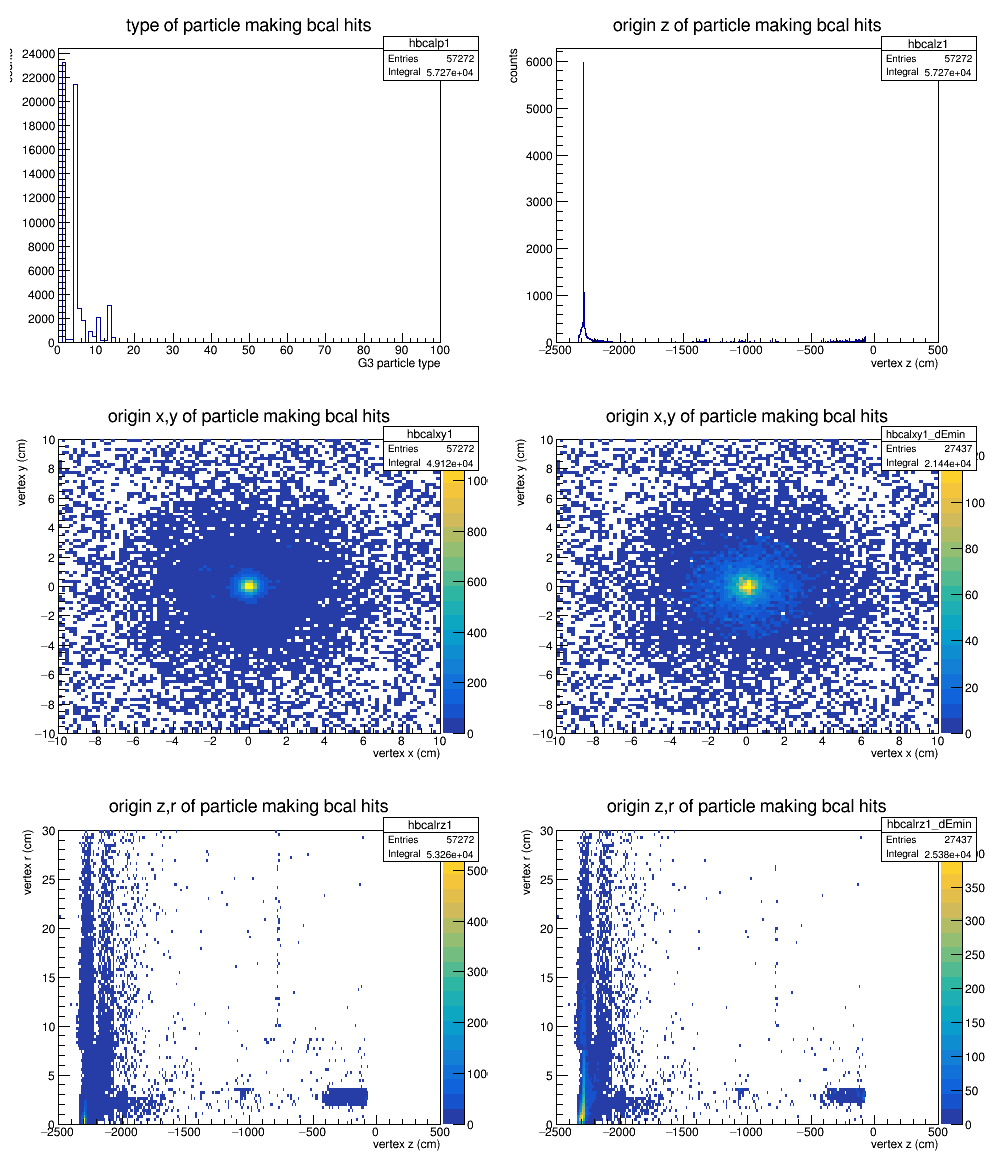

In [30]:
#hviews["bcal"].fill_histograms(particle_mass=particle_mass, accumsize=10)
hviews["bcal"].draw([[['hbcalp1', 'hbcalp1_dEmin'], ['hbcalz1', 'hbcalz1_dEmin']],
            [['hbcalxy1', ], ['hbcalxy1_dEmin',]],
            [['hbcalrz1', ], ['hbcalrz1_dEmin',]],
           ],
           [[['', ''], ['', '']],
            [['colz', ], ['colz',]],
            [['colz', ], ['colz',]],
           ], stats="ien")
hviews["bcal"].current_canvas.cd(0)
hviews["bcal"].current_canvas.Draw()

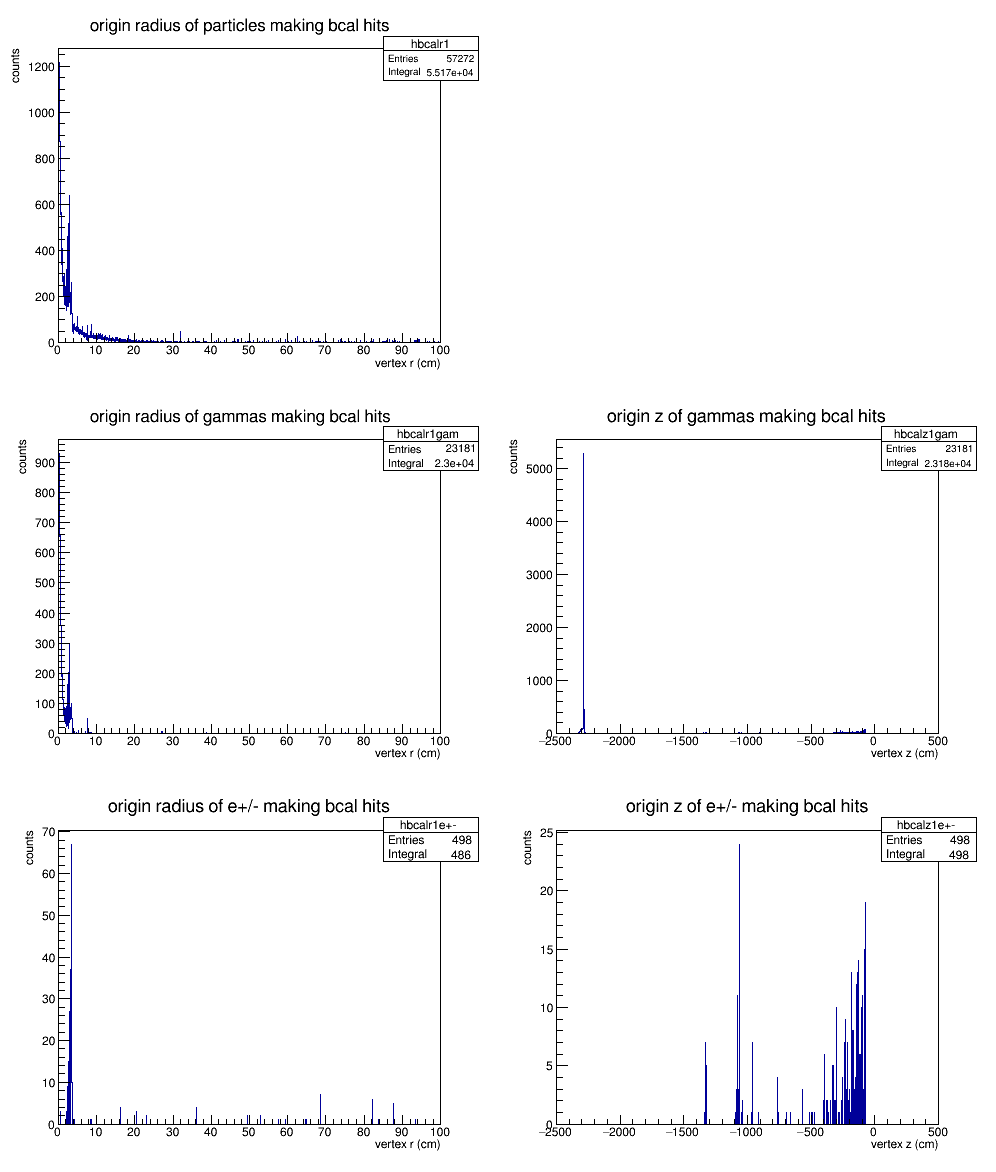

In [31]:
hviews["bcal"].draw([[['hbcalr1', 'hbcalr1_dEmin'], ],
            [['hbcalr1gam', 'hbcalr1gam_dEmin'], ['hbcalz1gam', 'hbcalz1gam_dEmin']],
            [['hbcalr1e+-', 'hbcalr1e+-_dEmin'], ['hbcalz1e+-', 'hbcalz1e+-_dEmin']],
           ],
           [[['', ''], ['', '']],
            [['', ''], ['', '']],
            [['', ''], ['', '']],
           ], stats="ien")
hviews["bcal"].current_canvas.cd(0)
hviews["bcal"].current_canvas.Draw()

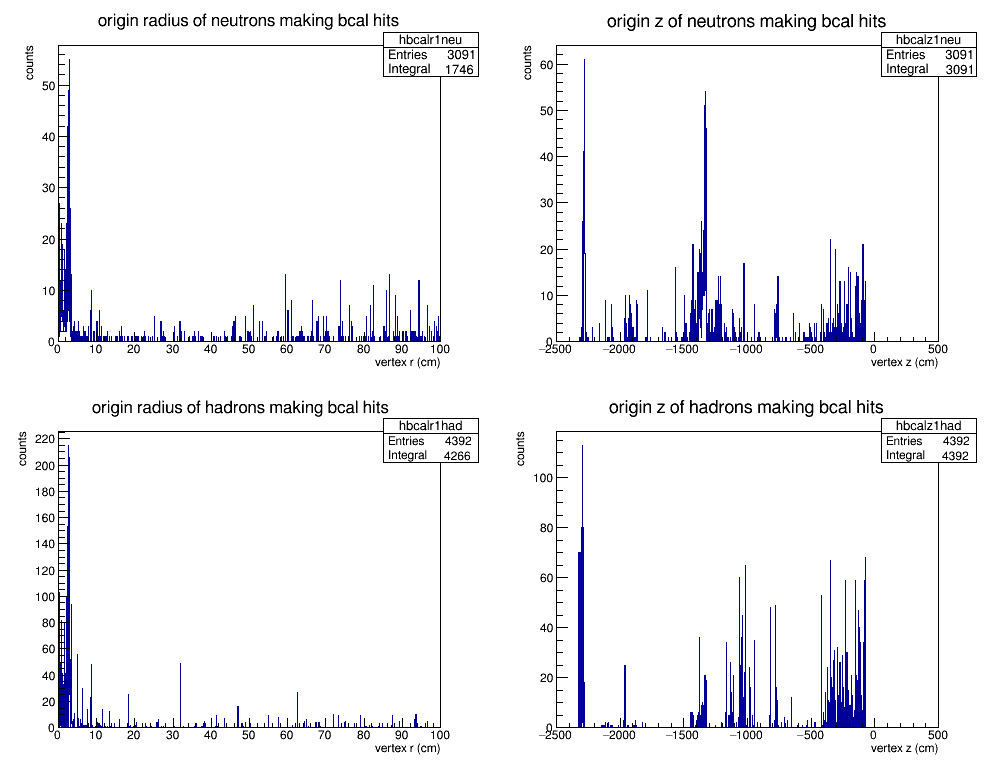

In [32]:
hviews["bcal"].draw([[['hbcalr1neu', 'hbcalr1neu_dEmin'], ['hbcalz1neu', 'hbcalz1neu_dEmin']],
            [['hbcalr1had', 'hbcalr1had_dEmin'], ['hbcalz1had', 'hbcalz1had_dEmin']],
           ],
           [[['', ''], ['', '']],
            [['', ''], ['', '']],
           ], stats="ien")
hviews["bcal"].current_canvas.cd(0)
hviews["bcal"].current_canvas.Draw()

total fraction beyond 4cm is 0.233


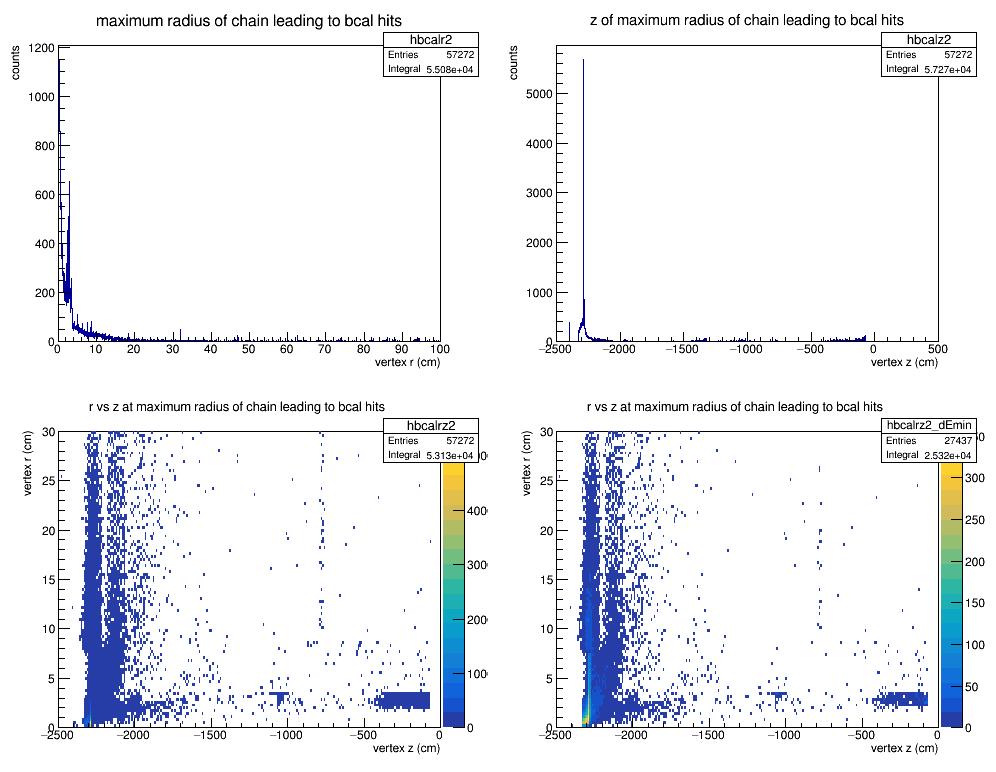

In [33]:
hviews["bcal"].draw([[['hbcalr2', 'hbcalr2_dEmin'],['hbcalz2', 'hbcalz2_dEmin',]],
            [['hbcalrz2'], ['hbcalrz2_dEmin']]
           ],
           [[['', ''], ['', '']],
            [['colz'], ['colz']]
           ], stats="ien")
hviews["bcal"].current_canvas.cd(0)
hviews["bcal"].current_canvas.Draw()
hbcalr2 = hviews["bcal"].get('hbcalr2')
print(f"total fraction beyond 4cm is {hbcalr2.Integral(hbcalr2.FindBin(4)+1, 1000) / (hbcalr2.Integral()+1e-99):0.3}")

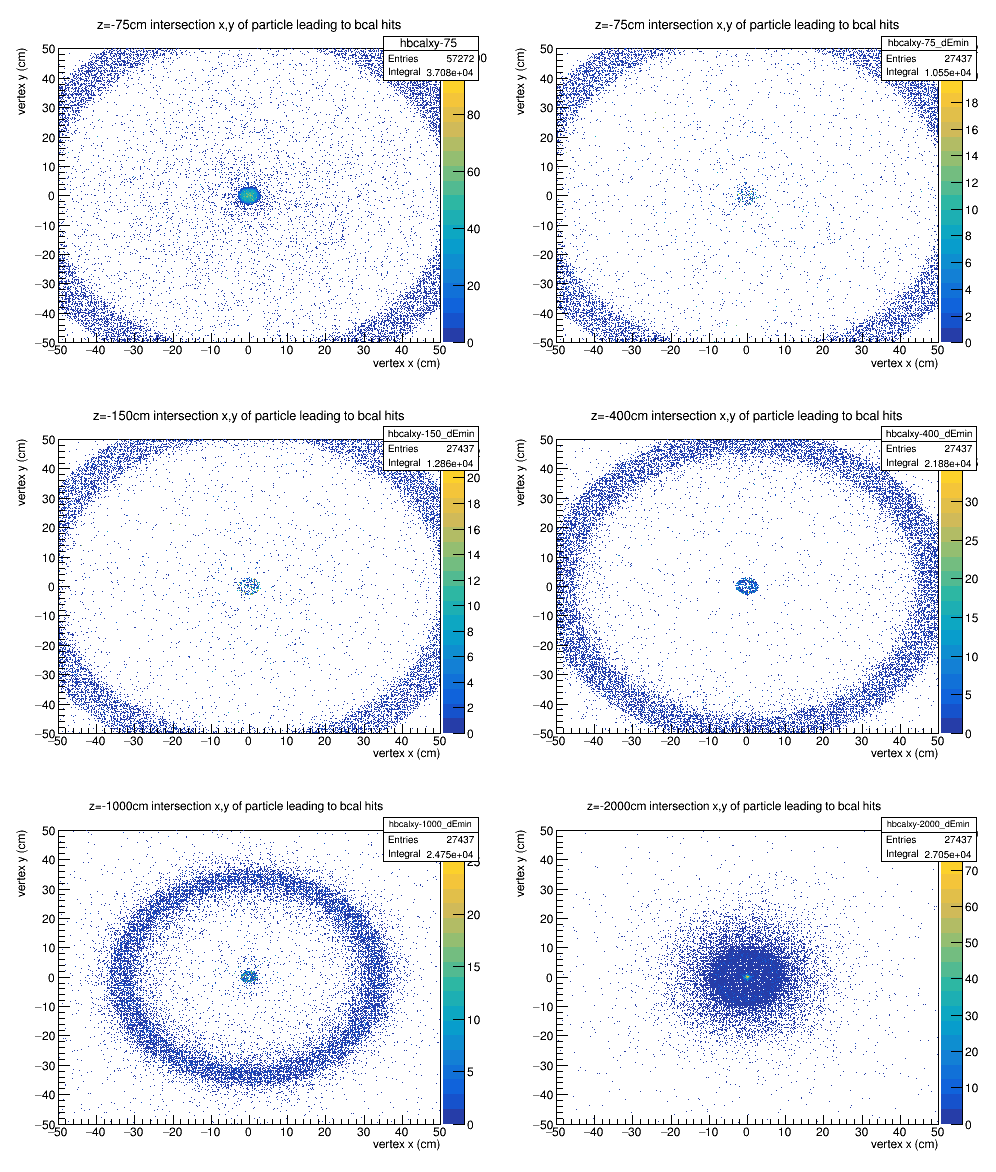

In [34]:
hviews["bcal"].draw([[['hbcalxy-75'], ['hbcalxy-75_dEmin']],
                     [['hbcalxy-150_dEmin'], ['hbcalxy-400_dEmin']],
                     [['hbcalxy-1000_dEmin'], ['hbcalxy-2000_dEmin']],
                    ],
                    [[['colz'], ['colz']],
                     [['colz'], ['colz']],
                     [['colz'], ['colz']],
                    ], stats="ien")
hviews["bcal"].current_canvas.cd(0)
hviews["bcal"].current_canvas.Draw()

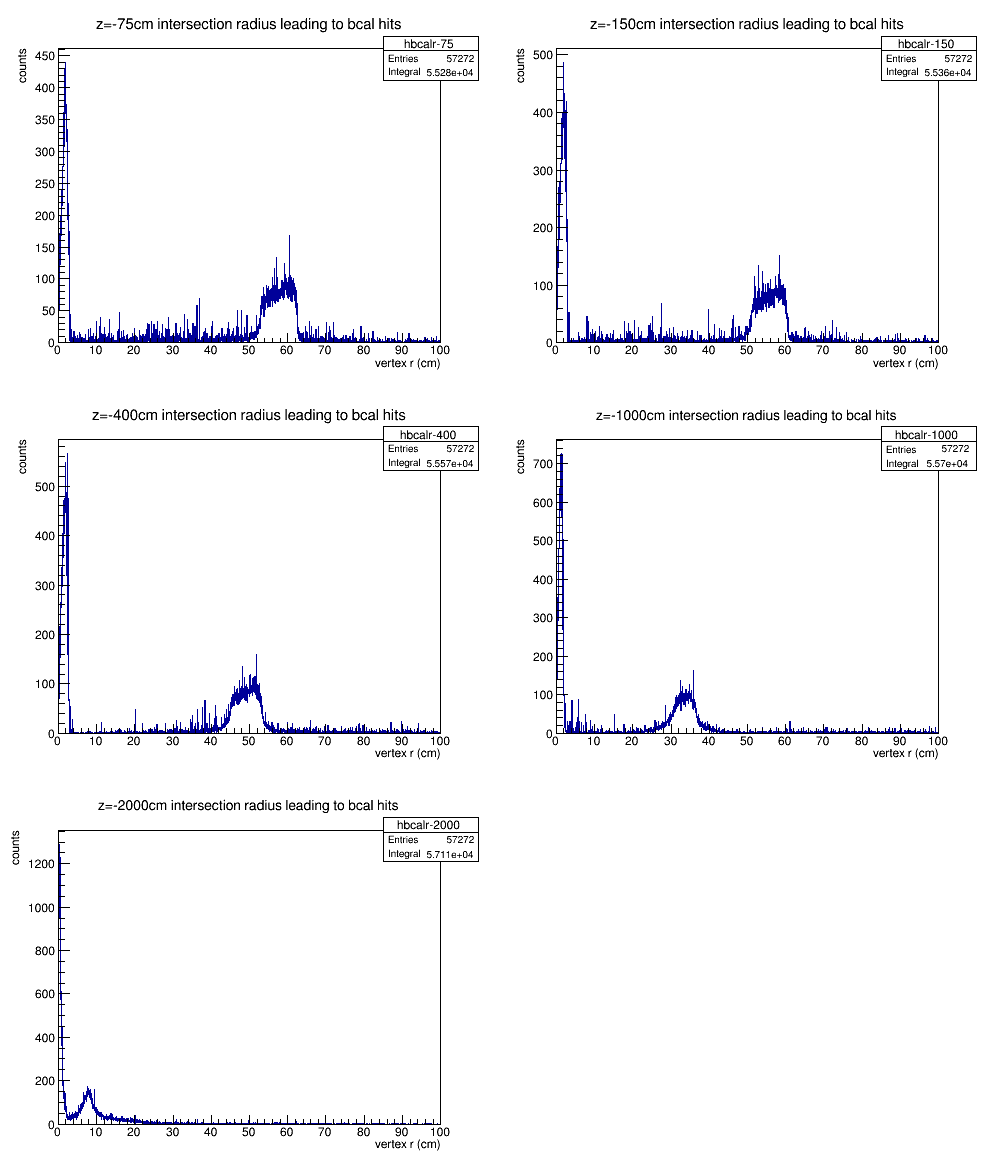

In [35]:
hviews["bcal"].draw([[['hbcalr-75', 'hbcalr-75_dEmin'], ['hbcalr-150', 'hbcalr-150_dEmin']],
                     [['hbcalr-400', 'hbcalr-400_dEmin'], ['hbcalr-1000', 'hbcalr-1000_dEmin']],
                     [['hbcalr-2000', 'hbcalr-2000_dEmin'], ]
                    ],
                    [[['', ''], ['', '']],
                     [['', ''], ['', '']],
                     [['', ''],],
                    ], stats="ien")
hviews["bcal"].current_canvas.cd(0)
hviews["bcal"].current_canvas.Draw()

In [36]:
def fcal_hits_hinit():
    h = {}
    h['hfcalp1'] = ROOT.TH1D("hfcalp1", "type of particle making fcal hits", 100, 0, 100)
    h['hfcalp1'].GetXaxis().SetTitle("G3 particle type")
    h['hfcalp1'].GetYaxis().SetTitle("counts")
    h['hfcalz1'] = ROOT.TH1D("hfcalz1", "origin z of particle making fcal hits", 3000, -2500, 500)
    h['hfcalz1'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfcalz1'].GetYaxis().SetTitle("counts")
    h['hfcalxy1'] = ROOT.TH2D("hfcalxy1", "origin x,y of particle making fcal hits", 100, -10, 10, 100, -10, 10)
    h['hfcalxy1'].GetXaxis().SetTitle("vertex x (cm)")
    h['hfcalxy1'].GetYaxis().SetTitle("vertex y (cm)")
    h['hfcalrz1'] = ROOT.TH2D("hfcalrz1", "origin z,r of particle making fcal hits", 250, -2500, 500, 100, 0, 30)
    h['hfcalrz1'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfcalrz1'].GetYaxis().SetTitle("vertex r (cm)")
    h['hfcalr1'] = ROOT.TH1D("hfcalr1", "origin radius of particles making fcal hits", 3000, 0, 100)
    h['hfcalr1'].GetXaxis().SetTitle("vertex r (cm)")
    h['hfcalr1'].GetYaxis().SetTitle("counts")
    h['hfcalr2'] = ROOT.TH1D("hfcalr2", "maximum radius of chain leading to fcal hits", 3000, 0, 100)
    h['hfcalr2'].GetXaxis().SetTitle("vertex r (cm)")
    h['hfcalr2'].GetYaxis().SetTitle("counts")
    h['hfcalz2'] = ROOT.TH1D("hfcalz2", "z of maximum radius of chain leading to fcal hits", 3000, -2500, 500)
    h['hfcalz2'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfcalz2'].GetYaxis().SetTitle("counts")
    h['hfcalrz2'] = ROOT.TH2D("hfcalrz2", "r vs z at maximum radius of chain leading to fcal hits", 250, -2500, 0, 100, 0, 30)
    h['hfcalrz2'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfcalrz2'].GetYaxis().SetTitle("vertex r (cm)")
    for zint in zint_planes:
        hxy = f"hfcalxy{zint}"
        hrad = f"hfcalr{zint}"
        h[hxy] = ROOT.TH2D(hxy, f"z={zint}cm intersection x,y of particle leading to fcal hits", 500, -50, 50, 500, -50, 50)
        h[hxy].GetXaxis().SetTitle("vertex x (cm)")
        h[hxy].GetYaxis().SetTitle("vertex y (cm)")
        h[hrad] = ROOT.TH1D(hrad, f"z={zint}cm intersection radius leading to fcal hits", 3000, 0, 100)
        h[hrad].GetXaxis().SetTitle("vertex r (cm)")
        h[hrad].GetYaxis().SetTitle("counts")
    h['hfcalr1gam'] = ROOT.TH1D("hfcalr1gam", "origin radius of gammas making fcal hits", 3000, 0, 100)
    h['hfcalr1gam'].GetXaxis().SetTitle("vertex r (cm)")
    h['hfcalr1gam'].GetYaxis().SetTitle("counts")
    h['hfcalr1e+-'] = ROOT.TH1D("hfcalr1e+-", "origin radius of e+/- making fcal hits", 3000, 0, 100)
    h['hfcalr1e+-'].GetXaxis().SetTitle("vertex r (cm)")
    h['hfcalr1e+-'].GetYaxis().SetTitle("counts")
    h['hfcalr1neu'] = ROOT.TH1D("hfcalr1neu", "origin radius of neutrons making fcal hits", 3000, 0, 100)
    h['hfcalr1neu'].GetXaxis().SetTitle("vertex r (cm)")
    h['hfcalr1neu'].GetYaxis().SetTitle("counts")
    h['hfcalr1had'] = ROOT.TH1D("hfcalr1had", "origin radius of hadrons making fcal hits", 3000, 0, 100)
    h['hfcalr1had'].GetXaxis().SetTitle("vertex r (cm)")
    h['hfcalr1had'].GetYaxis().SetTitle("counts")
    h['hfcalz1gam'] = ROOT.TH1D("hfcalz1gam", "origin z of gammas making fcal hits", 3000, -2500, 500)
    h['hfcalz1gam'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfcalz1gam'].GetYaxis().SetTitle("counts")
    h['hfcalz1e+-'] = ROOT.TH1D("hfcalz1e+-", "origin z of e+/- making fcal hits", 3000, -2500, 500)
    h['hfcalz1e+-'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfcalz1e+-'].GetYaxis().SetTitle("counts")
    h['hfcalz1neu'] = ROOT.TH1D("hfcalz1neu", "origin z of neutrons making fcal hits", 3000, -2500, 500)
    h['hfcalz1neu'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfcalz1neu'].GetYaxis().SetTitle("counts")
    h['hfcalz1had'] = ROOT.TH1D("hfcalz1had", "origin z of hadrons making fcal hits", 3000, -2500, 500)
    h['hfcalz1had'].GetXaxis().SetTitle("vertex z (cm)")
    h['hfcalz1had'].GetYaxis().SetTitle("counts")
    hclones = {}
    for hname in h:
        hname2 = hname + "_dEmin"
        hclones[hname2] = h[hname].Clone(hname2)
        hclones[hname2].SetLineColor(ROOT.kOrange + 7)
    h.update(hclones)
    return h

def fcal_hits_hfill(record, histos, dEmin=0.05, z5=-75):
    for pev in record.getPhysicsEvents():
        run = pev.runNo
    for pnt in record.getFcalTruthShowers():
        x1,y1,z1 = (pnt.x, pnt.y, pnt.z)
        r2max,zmax = 0,0
        torigins = pnt.getTrackOrigins()
        crossed = {zint: False for zint in zint_planes}
        for torigin in torigins:
            if torigins[-1].z > -300:
                x0,y0,z0 = (torigin.x, torigin.y*10, torigin.z*10)
            else:
                x0,y0,z0 = (torigin.x, torigin.y, torigin.z)
            if z0 < z5 and not crossed[z5]:
                histos['hfcalp1'].Fill(torigin.ptype)
                histos['hfcalz1'].Fill(z0)
                histos['hfcalxy1'].Fill(x0,y0)
                histos['hfcalr1'].Fill((x0**2 + y0**2)**0.5)
                histos['hfcalrz1'].Fill(z0, (x0**2 + y0**2)**0.5)
                if torigin.ptype == 1:
                    histos['hfcalr1gam'].Fill((x0**2 + y0**2)**0.5)
                    histos['hfcalz1gam'].Fill(z0)
                elif torigin.ptype == 2 or torigin.ptype == 3:
                    histos['hfcalr1e+-'].Fill((x0**2 + y0**2)**0.5)
                    histos['hfcalz1e+-'].Fill(z0)
                elif torigin.ptype == 13:
                    histos['hfcalr1neu'].Fill((x0**2 + y0**2)**0.5)
                    histos['hfcalz1neu'].Fill(z0)
                elif torigin.ptype > 7:
                    histos['hfcalr1had'].Fill((x0**2 + y0**2)**0.5)
                    histos['hfcalz1had'].Fill(z0)
                if pnt.E - particle_mass[pnt.ptype] > dEmin:
                    histos['hfcalp1_dEmin'].Fill(torigin.ptype)
                    histos['hfcalz1_dEmin'].Fill(z0)
                    histos['hfcalxy1_dEmin'].Fill(x0,y0)
                    histos['hfcalr1_dEmin'].Fill((x0**2 + y0**2)**0.5)
                    histos['hfcalrz1_dEmin'].Fill(z0, (x0**2 + y0**2)**0.5)
                    if torigin.ptype == 1:
                        histos['hfcalr1gam_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hfcalz1gam_dEmin'].Fill(z0)
                    elif torigin.ptype == 2 or torigin.ptype == 3:
                        histos['hfcalr1e+-_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hfcalz1e+-_dEmin'].Fill(z0)
                    elif torigin.ptype == 13:
                        histos['hfcalr1neu_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hfcalz1neu_dEmin'].Fill(z0)
                    elif torigin.ptype > 6:
                        histos['hfcalr1had_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hfcalz1had_dEmin'].Fill(z0)
                for zint in zint_planes:
                    if z0 < zint and not crossed[zint]:
                        crossed[zint] = True
                        xint = x0 + (x1 - x0) * (zint - z0)/(z1 - z0)
                        yint = y0 + (y1 - y0) * (zint - z0)/(z1 - z0)
                        histos[f'hfcalxy{zint}'].Fill(xint,yint)
                        histos[f'hfcalr{zint}'].Fill((xint**2 + yint**2)**0.5)
                        if pnt.E - particle_mass[pnt.ptype] > dEmin:
                            histos[f'hfcalxy{zint}_dEmin'].Fill(xint,yint)
                            histos[f'hfcalr{zint}_dEmin'].Fill((xint**2 + yint**2)**0.5)
            if crossed[z5] and x0**2 + y0**2 > r2max:
                r2max = x0**2 + y0**2
                zmax = z0
            x1,y1,z1 = (x0,y0,z0)
        if r2max > 0:
            histos['hfcalr2'].Fill(r2max**0.5)
            histos['hfcalz2'].Fill(zmax)
            histos['hfcalrz2'].Fill(zmax, r2max**0.5)
            if pnt.E - particle_mass[pnt.ptype] > dEmin:
                histos['hfcalr2_dEmin'].Fill(r2max**0.5)
                histos['hfcalz2_dEmin'].Fill(zmax)
                histos['hfcalrz2_dEmin'].Fill(zmax, r2max**0.5)
    return histos

n = hviews["fcal"].declare_histograms("forward calorimeter", fcal_hits_hinit, fcal_hits_hfill)

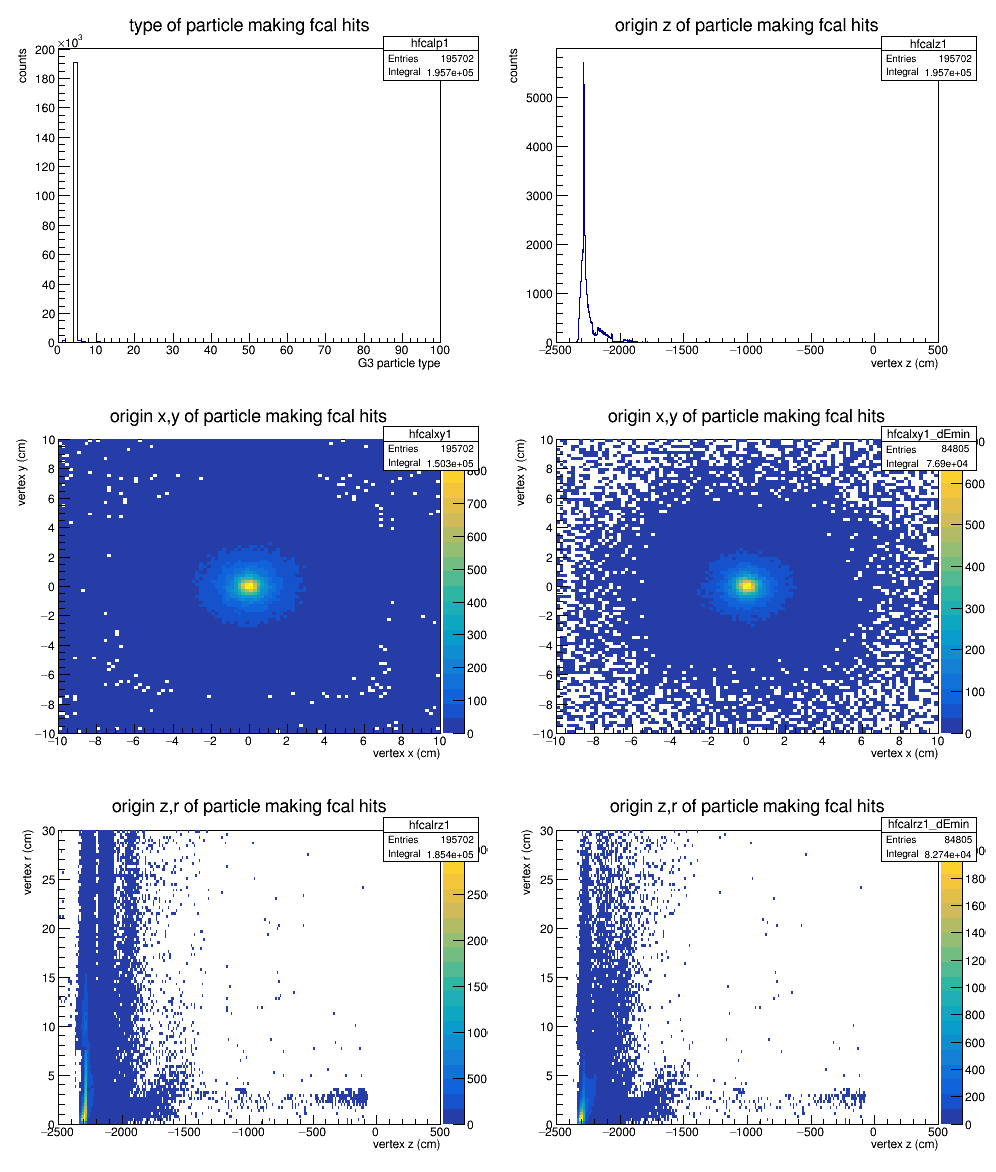

In [37]:
#hviews["fcal"].fill_histograms(particle_mass=particle_mass, accumsize=10)
hviews["fcal"].draw([[['hfcalp1', 'hfcalp1_dEmin'], ['hfcalz1', 'hfcalz1_dEmin']],
            [['hfcalxy1', ], ['hfcalxy1_dEmin',]],
            [['hfcalrz1', ], ['hfcalrz1_dEmin',]],
           ],
           [[['', ''], ['', '']],
            [['colz', ], ['colz',]],
            [['colz', ], ['colz',]],
           ], stats="ien")
hviews["fcal"].current_canvas.cd(0)
hviews["fcal"].current_canvas.Draw()

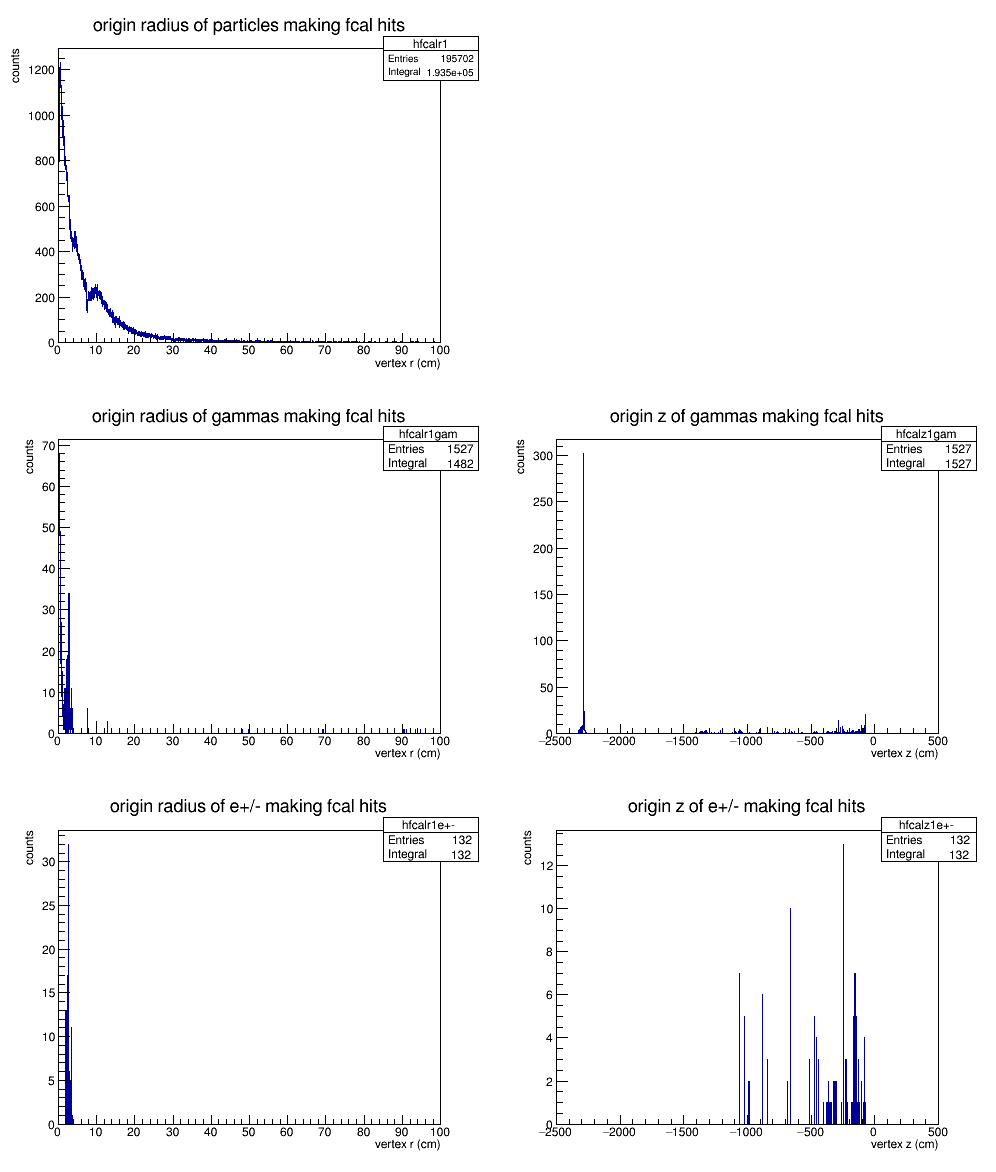

In [38]:
hviews["fcal"].draw([[['hfcalr1', 'hfcalr1_dEmin'], ],
            [['hfcalr1gam', 'hfcalr1gam_dEmin'], ['hfcalz1gam', 'hfcalz1gam_dEmin']],
            [['hfcalr1e+-', 'hfcalr1e+-_dEmin'], ['hfcalz1e+-', 'hfcalz1e+-_dEmin']],
           ],
           [[['', ''], ['', '']],
            [['', ''], ['', '']],
            [['', ''], ['', '']],
           ], stats="ien")
hviews["fcal"].current_canvas.cd(0)
hviews["fcal"].current_canvas.Draw()

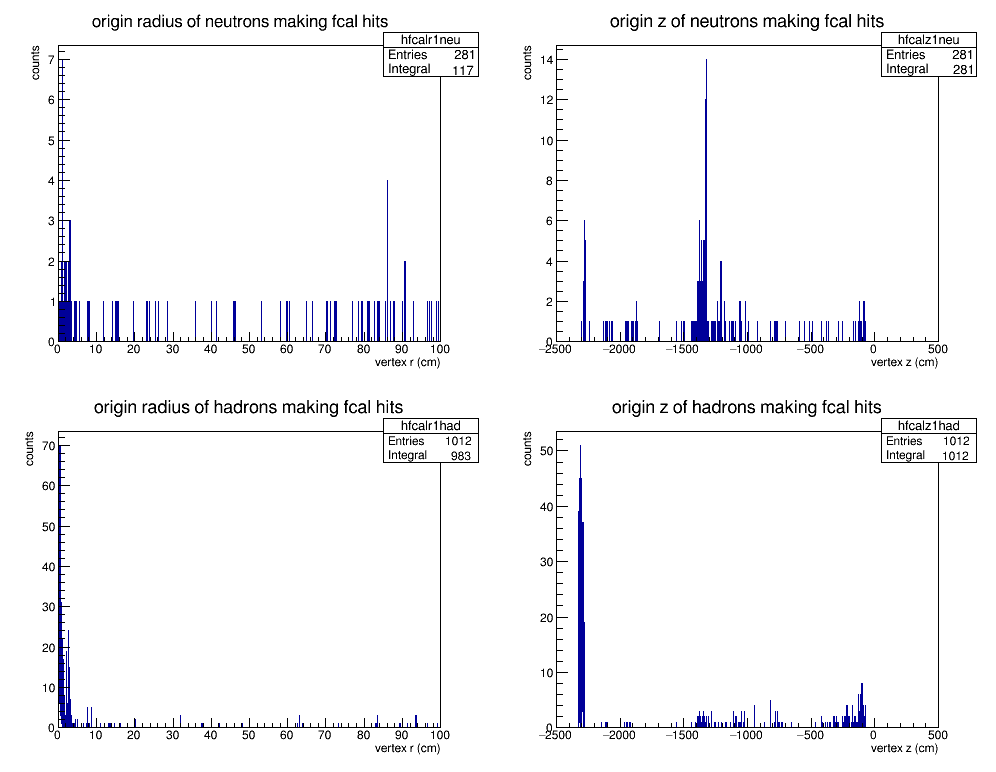

In [39]:
hviews["fcal"].draw([[['hfcalr1neu', 'hfcalr1neu_dEmin'], ['hfcalz1neu', 'hfcalz1neu_dEmin']],
            [['hfcalr1had', 'hfcalr1had_dEmin'], ['hfcalz1had', 'hfcalz1had_dEmin']],
           ],
           [[['', ''], ['', '']],
            [['', ''], ['', '']],
           ], stats="ien")
hviews["fcal"].current_canvas.cd(0)
hviews["fcal"].current_canvas.Draw()

total fraction beyond 4cm is 0.511


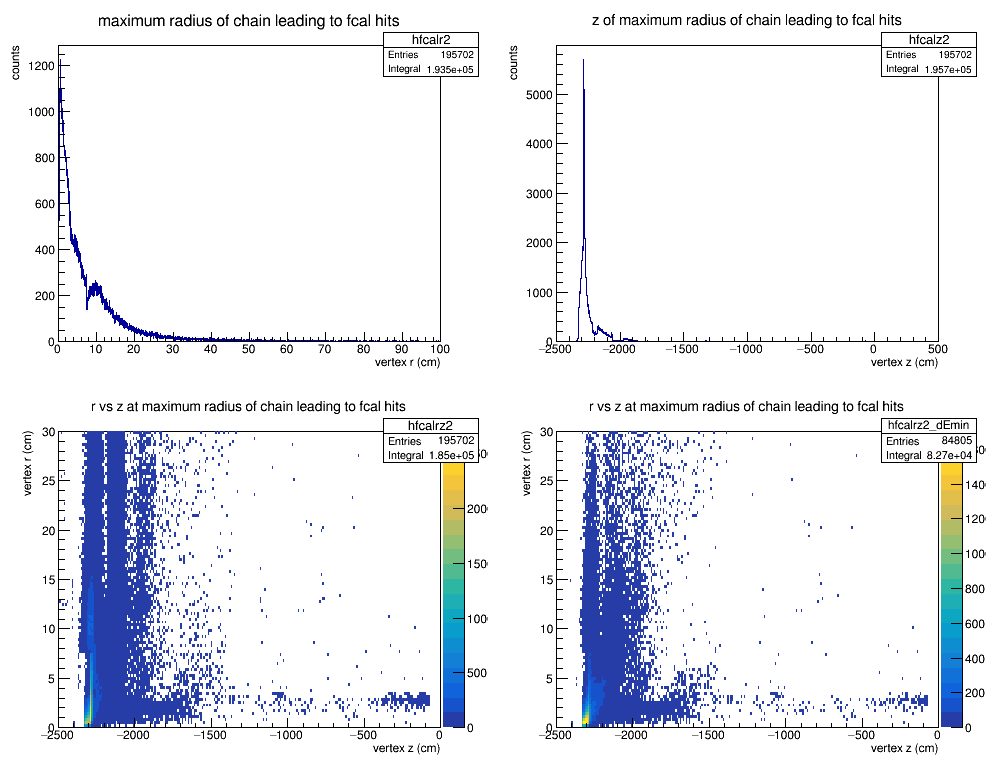

In [40]:
hviews["fcal"].draw([[['hfcalr2', 'hfcalr2_dEmin'],['hfcalz2', 'hfcalz2_dEmin',]],
            [['hfcalrz2'], ['hfcalrz2_dEmin']]
           ],
           [[['', ''], ['', '']],
            [['colz'], ['colz']]
           ], stats="ien")
hviews["fcal"].current_canvas.cd(0)
hviews["fcal"].current_canvas.Draw()
hfcalr2 = hviews["fcal"].get('hfcalr2')
print(f"total fraction beyond 4cm is {hfcalr2.Integral(hfcalr2.FindBin(4)+1, 1000) / (hfcalr2.Integral()+1e-99):0.3}")

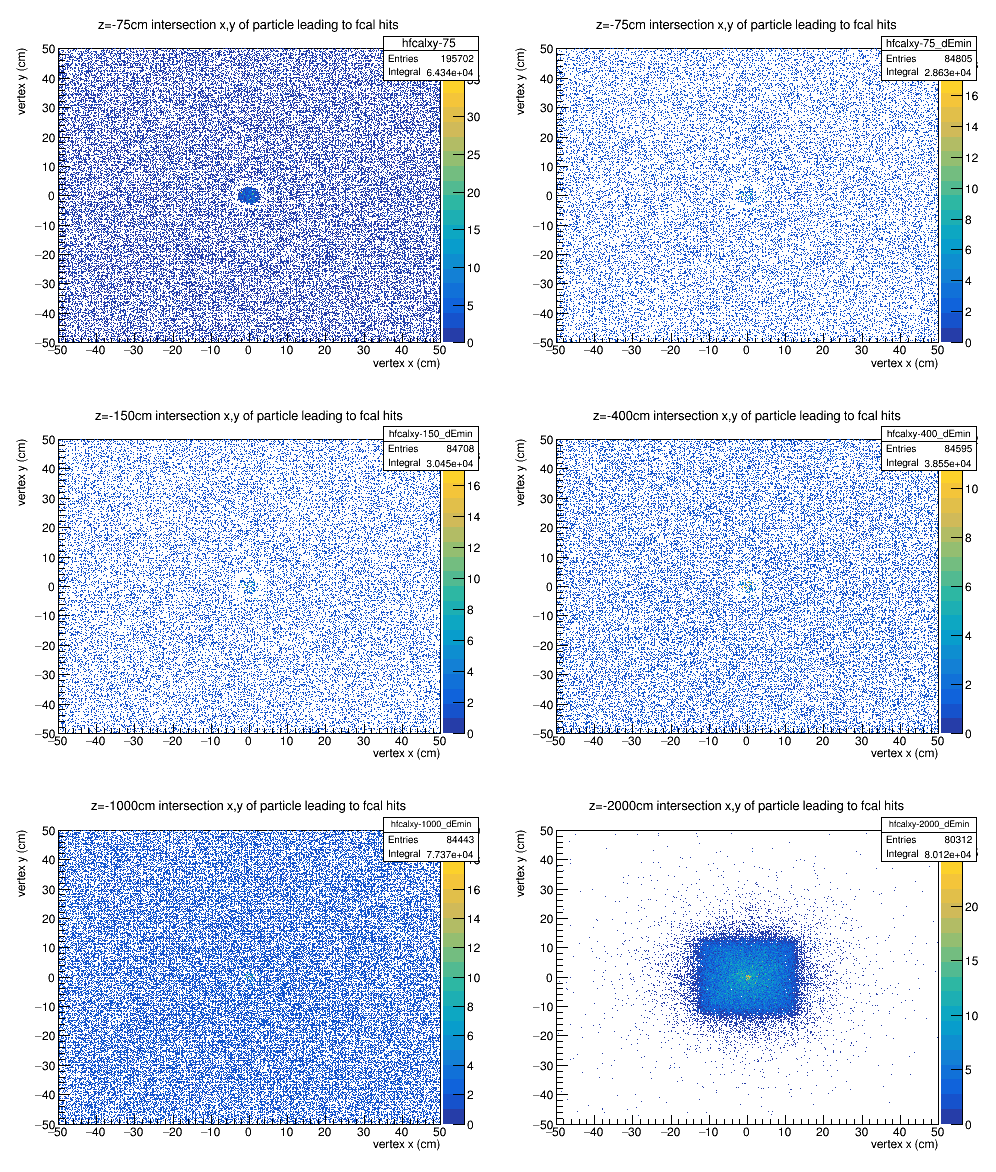

In [41]:
hviews["fcal"].draw([[['hfcalxy-75'], ['hfcalxy-75_dEmin']],
                     [['hfcalxy-150_dEmin'], ['hfcalxy-400_dEmin']],
                     [['hfcalxy-1000_dEmin'], ['hfcalxy-2000_dEmin']],
                    ],
                    [[['colz'], ['colz']],
                     [['colz'], ['colz']],
                     [['colz'], ['colz']],
                    ], stats="ien")
hviews["fcal"].current_canvas.cd(0)
hviews["fcal"].current_canvas.Draw()

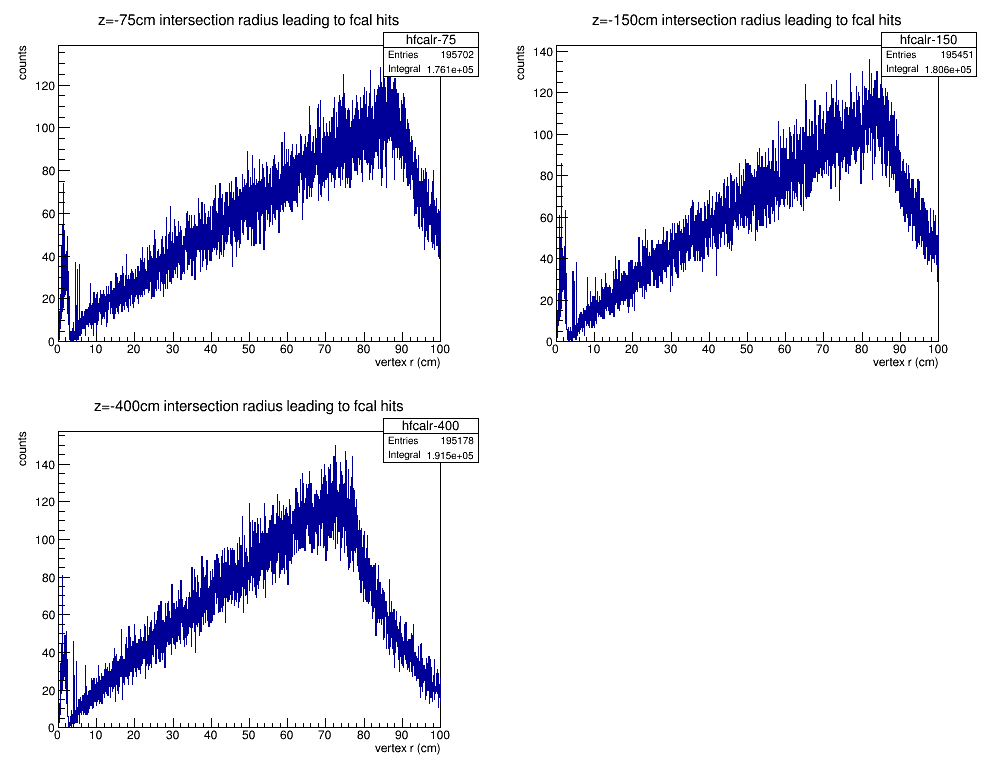

In [42]:
hviews["fcal"].draw([[['hfcalr-75', 'hfcalr-75_dEmin'],['hfcalr-150', 'hfcalr-150_dEmin']],
             [['hfcalr-400', 'hfcalr-400_dEmin'],]
            ],
           [[['', ''], ['', '']],
            [['', '']]
           ], stats="ien")
hviews["fcal"].current_canvas.cd(0)
hviews["fcal"].current_canvas.Draw()

In [43]:
def ftof_hits_hinit():
    h = {}
    h['hftofp1'] = ROOT.TH1D("hftofp1", "type of particle making ftof hits", 100, 0, 100)
    h['hftofp1'].GetXaxis().SetTitle("G3 particle type")
    h['hftofp1'].GetYaxis().SetTitle("counts")
    h['hftofz1'] = ROOT.TH1D("hftofz1", "origin z of particle making ftof hits", 3000, -2500, 500)
    h['hftofz1'].GetXaxis().SetTitle("vertex z (cm)")
    h['hftofz1'].GetYaxis().SetTitle("counts")
    h['hftofxy1'] = ROOT.TH2D("hftofxy1", "origin x,y of particle making ftof hits", 100, -10, 10, 100, -10, 10)
    h['hftofxy1'].GetXaxis().SetTitle("vertex x (cm)")
    h['hftofxy1'].GetYaxis().SetTitle("vertex y (cm)")
    h['hftofrz1'] = ROOT.TH2D("hftofrz1", "origin z,r of particle making ftof hits", 250, -2500, 500, 100, 0, 30)
    h['hftofrz1'].GetXaxis().SetTitle("vertex z (cm)")
    h['hftofrz1'].GetYaxis().SetTitle("vertex r (cm)")
    h['hftofr1'] = ROOT.TH1D("hftofr1", "origin radius of particles making ftof hits", 3000, 0, 100)
    h['hftofr1'].GetXaxis().SetTitle("vertex r (cm)")
    h['hftofr1'].GetYaxis().SetTitle("counts")
    h['hftofr2'] = ROOT.TH1D("hftofr2", "maximum radius of chain leading to ftof hits", 3000, 0, 100)
    h['hftofr2'].GetXaxis().SetTitle("vertex r (cm)")
    h['hftofr2'].GetYaxis().SetTitle("counts")
    h['hftofz2'] = ROOT.TH1D("hftofz2", "z of maximum radius of chain leading to ftof hits", 3000, -2500, 500)
    h['hftofz2'].GetXaxis().SetTitle("vertex z (cm)")
    h['hftofz2'].GetYaxis().SetTitle("counts")
    h['hftofrz2'] = ROOT.TH2D("hftofrz2", "r vs z at maximum radius of chain leading to ftof hits", 250, -2500, 0, 100, 0, 30)
    h['hftofrz2'].GetXaxis().SetTitle("vertex z (cm)")
    h['hftofrz2'].GetYaxis().SetTitle("vertex r (cm)")
    for zint in zint_planes:
        hxy = f"hftofxy{zint}"
        hrad = f"hftofr{zint}"
        h[hxy] = ROOT.TH2D(hxy, f"z={zint}cm intersection x,y of particle leading to ftof hits", 500, -50, 50, 500, -50, 50)
        h[hxy].GetXaxis().SetTitle("vertex x (cm)")
        h[hxy].GetYaxis().SetTitle("vertex y (cm)")
        h[hrad] = ROOT.TH1D(hrad, f"z={zint}cm intersection radius leading to ftof hits", 3000, 0, 100)
        h[hrad].GetXaxis().SetTitle("vertex r (cm)")
        h[hrad].GetYaxis().SetTitle("counts")
    h['hftofr1gam'] = ROOT.TH1D("hftofr1gam", "origin radius of gammas making ftof hits", 3000, 0, 100)
    h['hftofr1gam'].GetXaxis().SetTitle("vertex r (cm)")
    h['hftofr1gam'].GetYaxis().SetTitle("counts")
    h['hftofr1e+-'] = ROOT.TH1D("hftofr1e+-", "origin radius of e+/- making ftof hits", 3000, 0, 100)
    h['hftofr1e+-'].GetXaxis().SetTitle("vertex r (cm)")
    h['hftofr1e+-'].GetYaxis().SetTitle("counts")
    h['hftofr1neu'] = ROOT.TH1D("hftofr1neu", "origin radius of neutrons making ftof hits", 3000, 0, 100)
    h['hftofr1neu'].GetXaxis().SetTitle("vertex r (cm)")
    h['hftofr1neu'].GetYaxis().SetTitle("counts")
    h['hftofr1had'] = ROOT.TH1D("hftofr1had", "origin radius of hadrons making ftof hits", 3000, 0, 100)
    h['hftofr1had'].GetXaxis().SetTitle("vertex r (cm)")
    h['hftofr1had'].GetYaxis().SetTitle("counts")
    h['hftofz1gam'] = ROOT.TH1D("hftofz1gam", "origin z of gammas making ftof hits", 3000, -2500, 500)
    h['hftofz1gam'].GetXaxis().SetTitle("vertex z (cm)")
    h['hftofz1gam'].GetYaxis().SetTitle("counts")
    h['hftofz1e+-'] = ROOT.TH1D("hftofz1e+-", "origin z of e+/- making ftof hits", 3000, -2500, 500)
    h['hftofz1e+-'].GetXaxis().SetTitle("vertex z (cm)")
    h['hftofz1e+-'].GetYaxis().SetTitle("counts")
    h['hftofz1neu'] = ROOT.TH1D("hftofz1neu", "origin z of neutrons making ftof hits", 3000, -2500, 500)
    h['hftofz1neu'].GetXaxis().SetTitle("vertex z (cm)")
    h['hftofz1neu'].GetYaxis().SetTitle("counts")
    h['hftofz1had'] = ROOT.TH1D("hftofz1had", "origin z of hadrons making ftof hits", 3000, -2500, 500)
    h['hftofz1had'].GetXaxis().SetTitle("vertex z (cm)")
    h['hftofz1had'].GetYaxis().SetTitle("counts")
    hclones = {}
    for hname in h:
        hname2 = hname + "_dEmin"
        hclones[hname2] = h[hname].Clone(hname2)
        hclones[hname2].SetLineColor(ROOT.kOrange + 7)
    h.update(hclones)
    return h

def ftof_hits_hfill(record, histos, dEmin=1e-3, z5=-75):
    for pev in record.getPhysicsEvents():
        run = pev.runNo
    for pnt in record.getFtofTruthPoints():
        x1,y1,z1 = (pnt.x, pnt.y, pnt.z)
        r2max,zmax = 0,0
        torigins = pnt.getTrackOrigins()
        crossed = {zint: False for zint in zint_planes}
        for torigin in torigins:
            if torigins[-1].z > -300:
                x0,y0,z0 = (torigin.x, torigin.y*10, torigin.z*10)
            else:
                x0,y0,z0 = (torigin.x, torigin.y, torigin.z)
            if z0 < z5 and not crossed[z5]:
                histos['hftofp1'].Fill(torigin.ptype)
                histos['hftofz1'].Fill(z0)
                histos['hftofxy1'].Fill(x0,y0)
                histos['hftofr1'].Fill((x0**2 + y0**2)**0.5)
                histos['hftofrz1'].Fill(z0, (x0**2 + y0**2)**0.5)
                if torigin.ptype == 1:
                    histos['hftofr1gam'].Fill((x0**2 + y0**2)**0.5)
                    histos['hftofz1gam'].Fill(z0)
                elif torigin.ptype == 2 or torigin.ptype == 3:
                    histos['hftofr1e+-'].Fill((x0**2 + y0**2)**0.5)
                    histos['hftofz1e+-'].Fill(z0)
                elif torigin.ptype == 13:
                    histos['hftofr1neu'].Fill((x0**2 + y0**2)**0.5)
                    histos['hftofz1neu'].Fill(z0)
                elif torigin.ptype > 7:
                    histos['hftofr1had'].Fill((x0**2 + y0**2)**0.5)
                    histos['hftofz1had'].Fill(z0)
                if pnt.E - particle_mass[pnt.ptype] > dEmin:
                    histos['hftofp1_dEmin'].Fill(torigin.ptype)
                    histos['hftofz1_dEmin'].Fill(z0)
                    histos['hftofxy1_dEmin'].Fill(x0,y0)
                    histos['hftofr1_dEmin'].Fill((x0**2 + y0**2)**0.5)
                    histos['hftofrz1_dEmin'].Fill(z0, (x0**2 + y0**2)**0.5)
                    if torigin.ptype == 1:
                        histos['hftofr1gam_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hftofz1gam_dEmin'].Fill(z0)
                    elif torigin.ptype == 2 or torigin.ptype == 3:
                        histos['hftofr1e+-_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hftofz1e+-_dEmin'].Fill(z0)
                    elif torigin.ptype == 13:
                        histos['hftofr1neu_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hftofz1neu_dEmin'].Fill(z0)
                    elif torigin.ptype > 6:
                        histos['hftofr1had_dEmin'].Fill((x0**2 + y0**2)**0.5)
                        histos['hftofz1had_dEmin'].Fill(z0)
            for zint in zint_planes:
                if z0 < zint and not crossed[zint]:
                    crossed[zint] = True
                    xint = x0 + (x1 - x0) * (zint - z0)/(z1 - z0)
                    yint = y0 + (y1 - y0) * (zint - z0)/(z1 - z0)
                    histos[f'hftofxy{zint}'].Fill(xint,yint)
                    histos[f'hftofr{zint}'].Fill((xint**2 + yint**2)**0.5)
                    if pnt.E - particle_mass[pnt.ptype] > dEmin:
                        histos[f'hftofxy{zint}_dEmin'].Fill(xint,yint)
                        histos[f'hftofr{zint}_dEmin'].Fill((xint**2 + yint**2)**0.5)
            if crossed[z5] and x0**2 + y0**2 > r2max:
                r2max = x0**2 + y0**2
                zmax = z0
            x1,y1,z1 = (x0,y0,z0)
        if r2max > 0:
            histos['hftofr2'].Fill(r2max**0.5)
            histos['hftofz2'].Fill(zmax)
            histos['hftofrz2'].Fill(zmax, r2max**0.5)
            if pnt.E - particle_mass[pnt.ptype] > dEmin:
                histos['hftofr2_dEmin'].Fill(r2max**0.5)
                histos['hftofz2_dEmin'].Fill(zmax)
                histos['hftofrz2_dEmin'].Fill(zmax, r2max**0.5)
    return histos

n = hviews["ftof"].declare_histograms("forward time-of-flight", ftof_hits_hinit, ftof_hits_hfill)

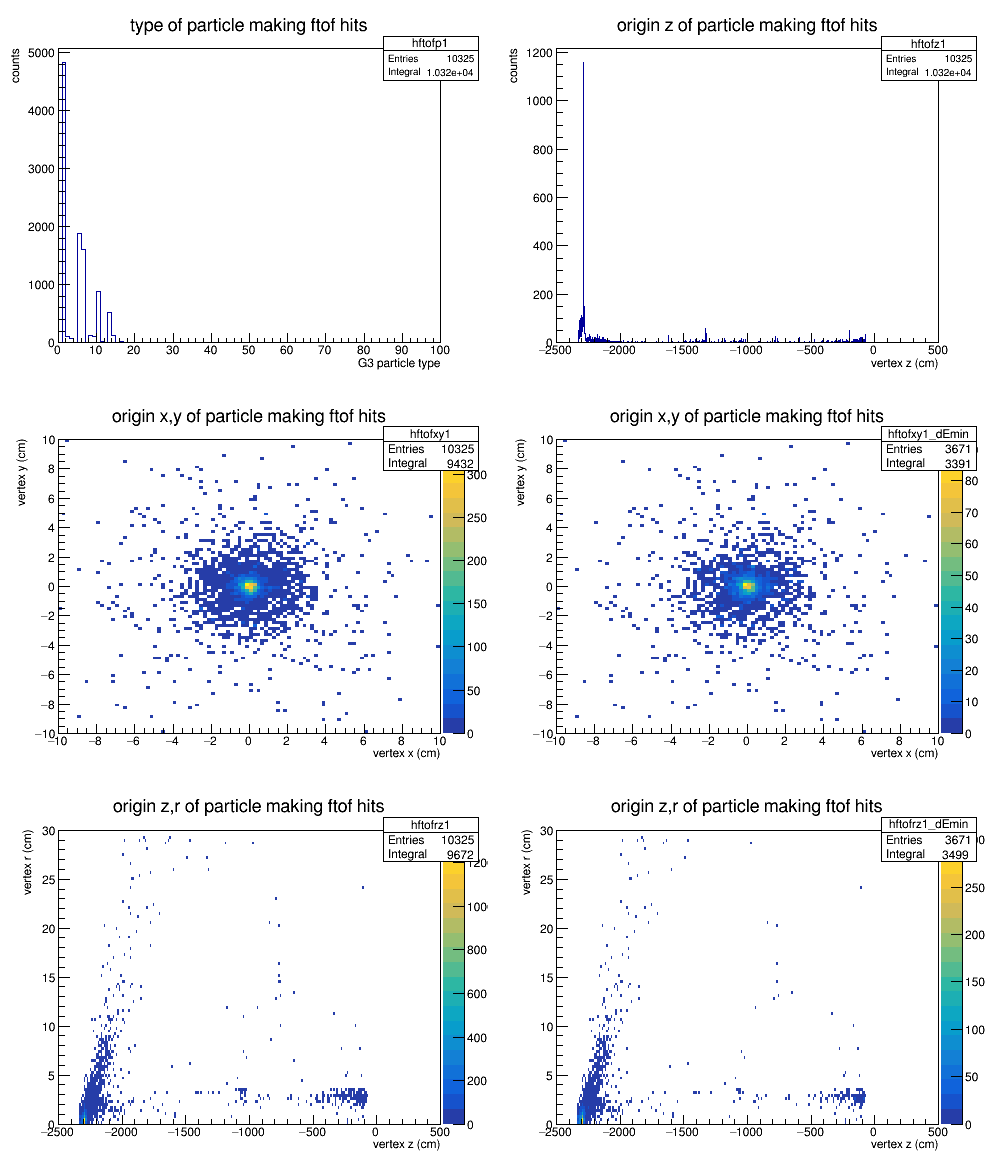

In [44]:
hviews["ftof"].draw([[['hftofp1', 'hftofp1_dEmin'], ['hftofz1', 'hftofz1_dEmin']],
             [['hftofxy1', ], ['hftofxy1_dEmin',]],
             [['hftofrz1', ], ['hftofrz1_dEmin',]],
            ],
            [[['', ''], ['', '']],
             [['colz', ], ['colz',]],
             [['colz', ], ['colz',]],
            ], stats="ien")
hviews["ftof"].current_canvas.cd(0)
hviews["ftof"].current_canvas.Draw()

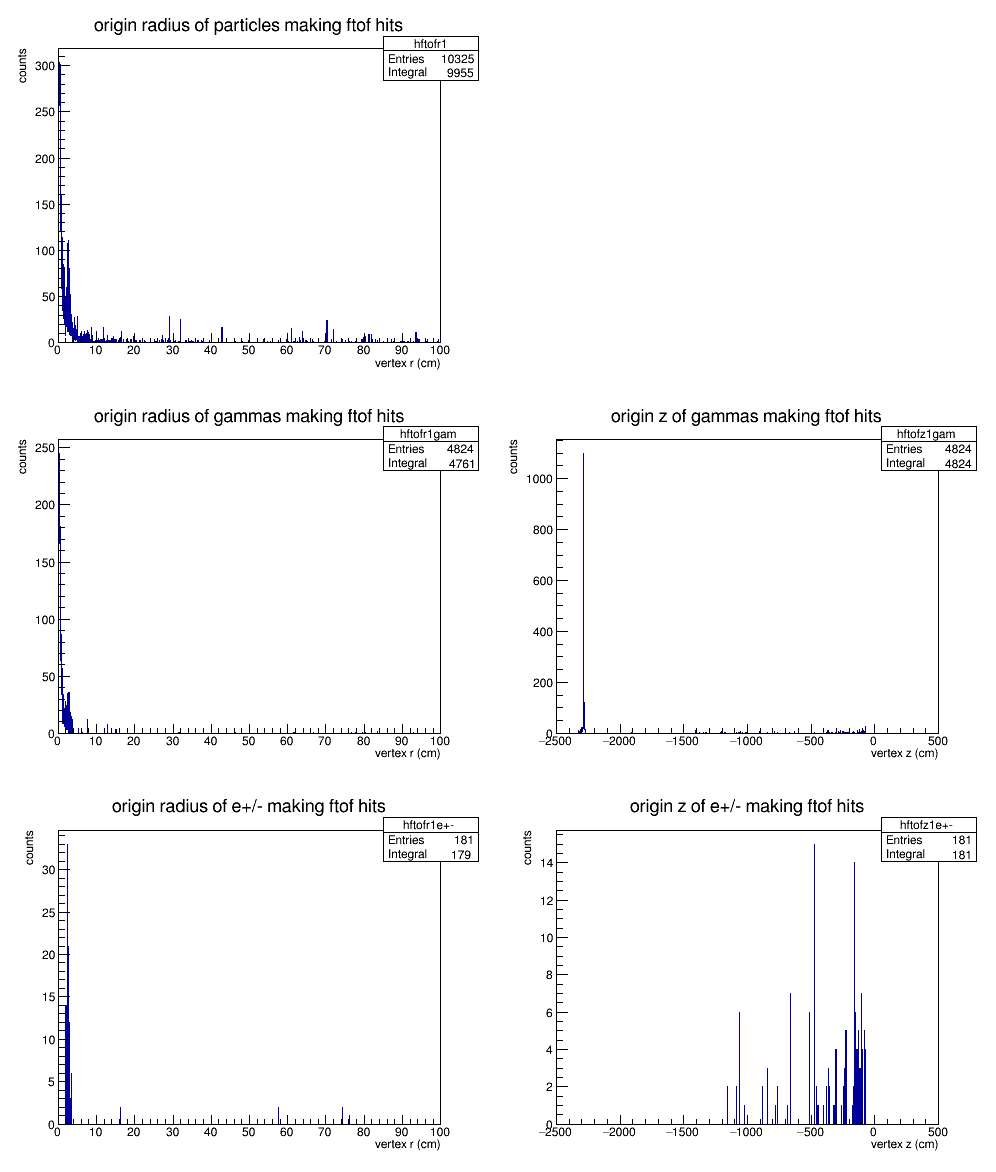

In [45]:
hviews["ftof"].draw([[['hftofr1', 'hftofr1_dEmin'], ],
             [['hftofr1gam', 'hftofr1gam_dEmin'], ['hftofz1gam', 'hftofz1gam_dEmin']],
             [['hftofr1e+-', 'hftofr1e+-_dEmin'], ['hftofz1e+-', 'hftofz1e+-_dEmin']],
            ],
            [[['', ''], ['', '']],
             [['', ''], ['', '']],
             [['', ''], ['', '']],
            ], stats="ien")
hviews["ftof"].current_canvas.cd(0)
hviews["ftof"].current_canvas.Draw()

fill_histograms read a total of 9998 tree files, 4999000000.0 records


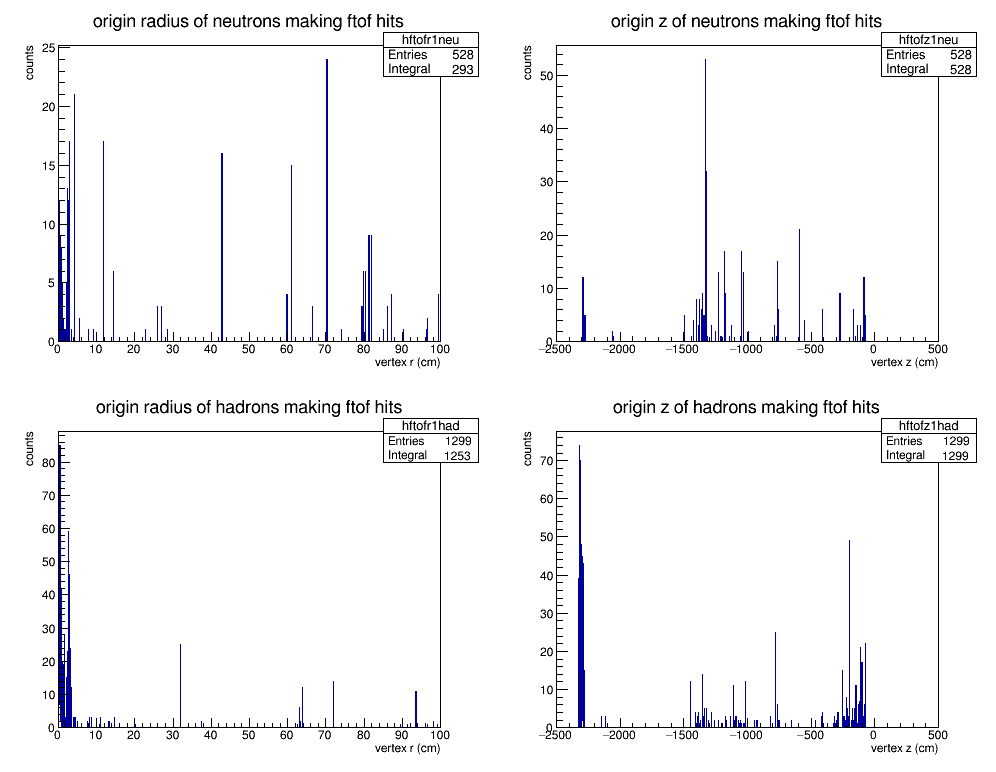

In [46]:
hviews["ftof"].fill_histograms(particle_mass=particle_mass, chunksize=2, accumsize=5)
hviews["ftof"].draw([[['hftofr1neu', 'hftofr1neu_dEmin'], ['hftofz1neu', 'hftofz1neu_dEmin']],
             [['hftofr1had', 'hftofr1had_dEmin'], ['hftofz1had', 'hftofz1had_dEmin']],
            ],
            [[['', ''], ['', '']],
             [['', ''], ['', '']],
            ], stats="ien")
hviews["ftof"].current_canvas.cd(0)
hviews["ftof"].current_canvas.Draw()

total fraction beyond 4cm is 0.0997


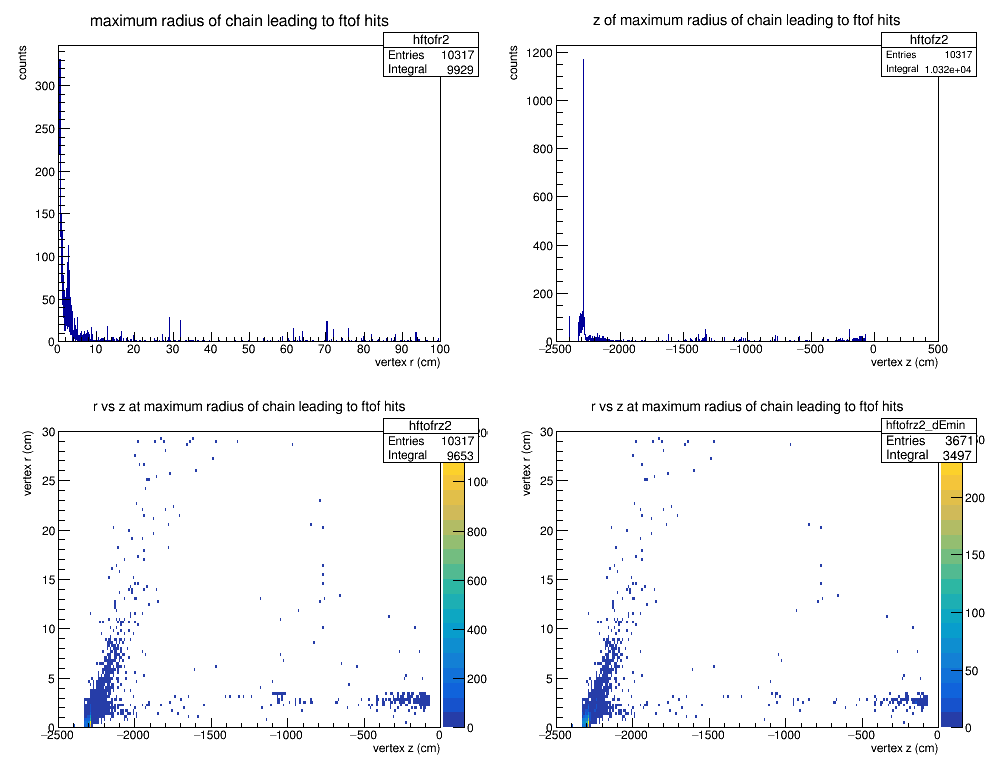

In [47]:
hviews["ftof"].draw([[['hftofr2', 'hftofr2_dEmin'],['hftofz2', 'hftofz2_dEmin',]],
            [['hftofrz2'], ['hftofrz2_dEmin']]
           ],
           [[['', ''], ['', '']],
            [['colz'], ['colz']]
           ], stats="ien")
hviews["ftof"].current_canvas.cd(0)
hviews["ftof"].current_canvas.Draw()
hftofr2 = hviews["ftof"].get('hftofr2')
print(f"total fraction beyond 4cm is {hftofr2.Integral(hftofr2.FindBin(4)+1, 1000) / (hftofr2.Integral()+1e-99):0.3}")

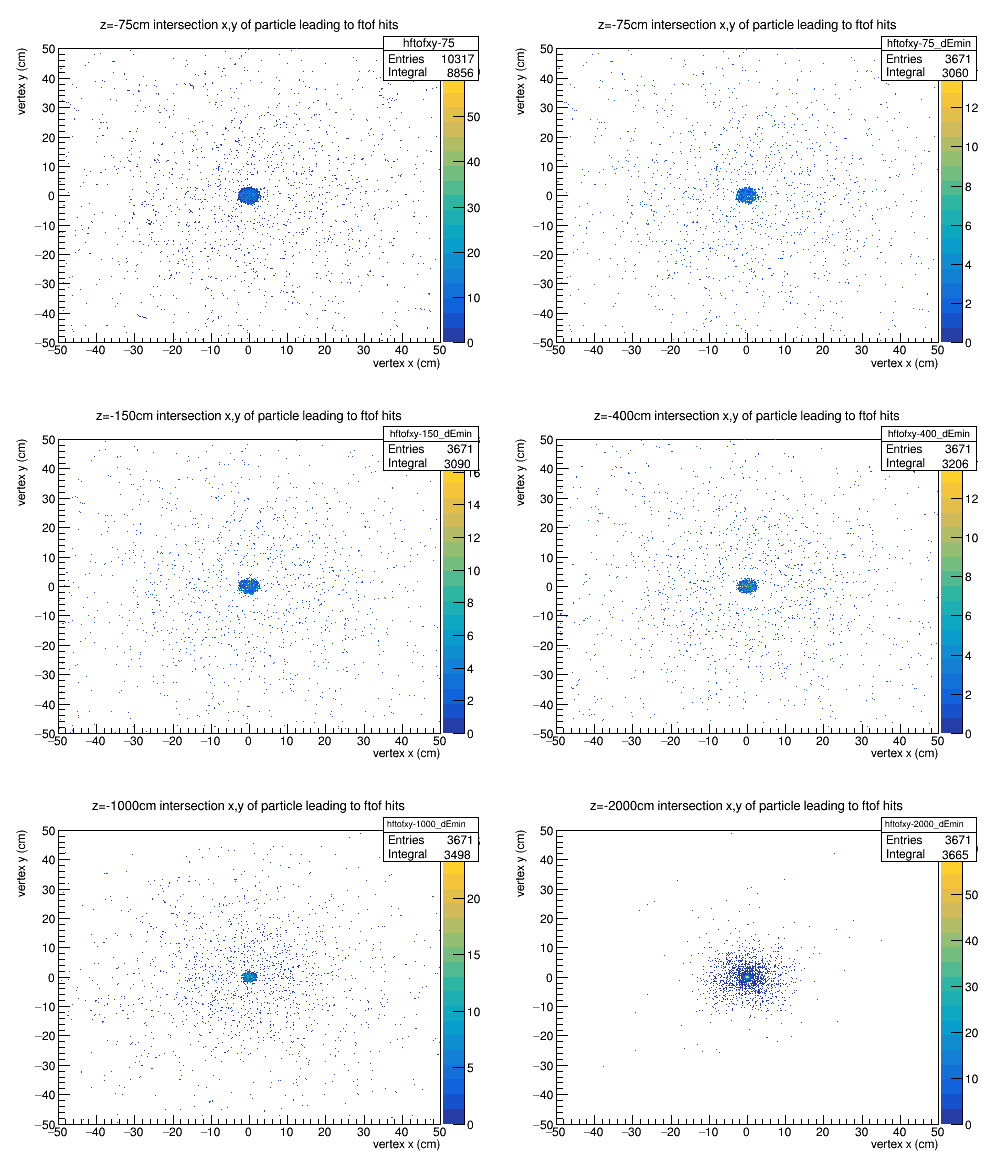

In [48]:
hviews["ftof"].draw([[['hftofxy-75'], ['hftofxy-75_dEmin']],
                     [['hftofxy-150_dEmin'], ['hftofxy-400_dEmin']],
                     [['hftofxy-1000_dEmin'], ['hftofxy-2000_dEmin']],
                    ],
                    [[['colz'], ['colz']],
                     [['colz'], ['colz']],
                     [['colz'], ['colz']],
                    ], stats="ien")
hviews["ftof"].current_canvas.cd(0)
hviews["ftof"].current_canvas.Draw()

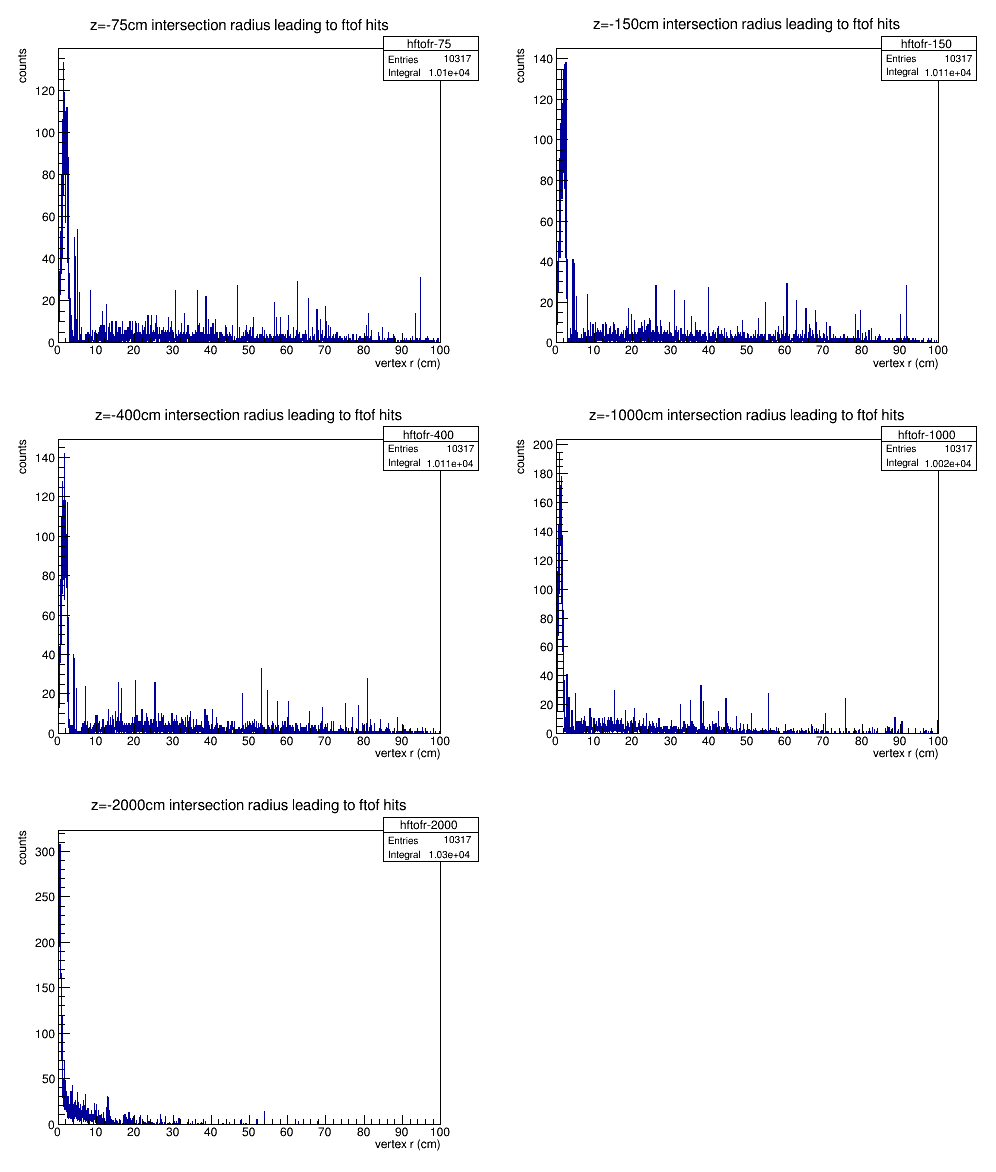

In [49]:
hviews["ftof"].draw([[['hftofr-75', 'hftofr-75_dEmin'], ['hftofr-150', 'hftofr-150_dEmin']],
                     [['hftofr-400', 'hftofr-400_dEmin'], ['hftofr-1000', 'hftofr-1000_dEmin']],
                     [['hftofr-2000', 'hftofr-2000_dEmin']]
                    ],
                    [[['', ''], ['', '']],
                     [['', ''], ['', '']],
                     [['', ''],]
                    ], stats="ien")
hviews["ftof"].current_canvas.cd(0)
hviews["ftof"].current_canvas.Draw()

In [50]:
hviews["ftof"].list_histograms(True)

hscp1;1         type of particle making start counter hits          4615   Thu Dec  5 07:49:14 2024
hscz1;1         origin z of particle making start counter hits       4615   Thu Dec  5 07:49:14 2024
hscxy1;1        origin x,y of particle making start counter hits       4615   Thu Dec  5 07:49:14 2024
hscrz1;1        origin z,r of particle making start counter hits       4615   Thu Dec  5 07:49:14 2024
hscr1;1         origin radius of particles making start counter hits       4615   Thu Dec  5 07:49:14 2024
hscr2;1         maximum radius of chain leading to start counter hits       4612   Thu Dec  5 07:49:14 2024
hscz2;1         z of maximum radius of chain leading to start counter hits       4612   Thu Dec  5 07:49:14 2024
hscrz2;1        r vs z at maximum radius of chain leading to start counter hits       4612   Thu Dec  5 07:49:14 2024
hscxy-75;1      z=-75cm intersection x,y of particle leading to start counter hits       4612   Thu Dec  5 07:49:14 2024
hscr-75;1       z=-75cm in

313

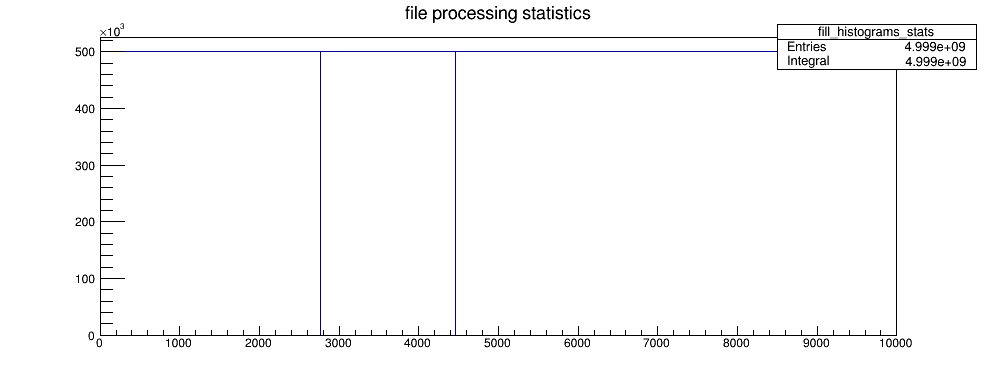

In [51]:
n = hviews["sc"].draw('fill_histograms_stats', width=1000, stats="ien")

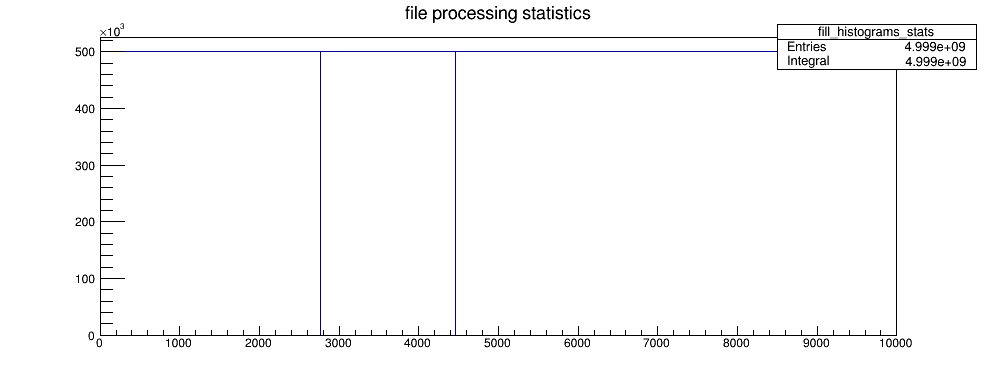

In [52]:
n = hviews["cdc"].draw('fill_histograms_stats', width=1000, stats="ien")

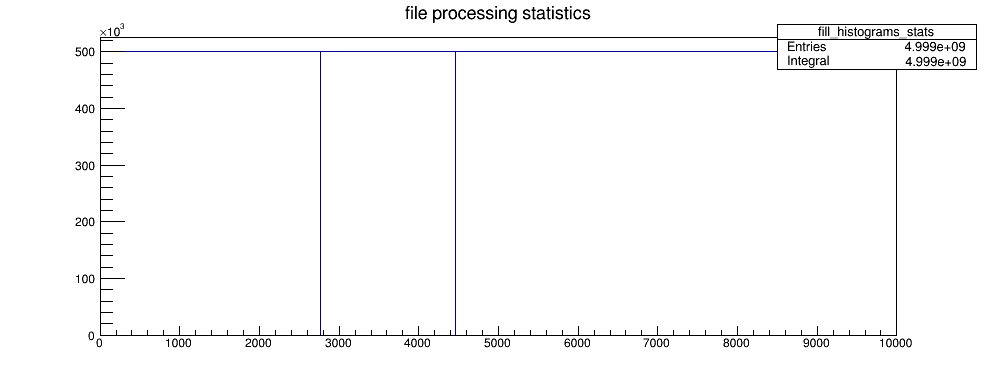

In [53]:
n = hviews["fdc"].draw('fill_histograms_stats', width=1000, stats="ien")

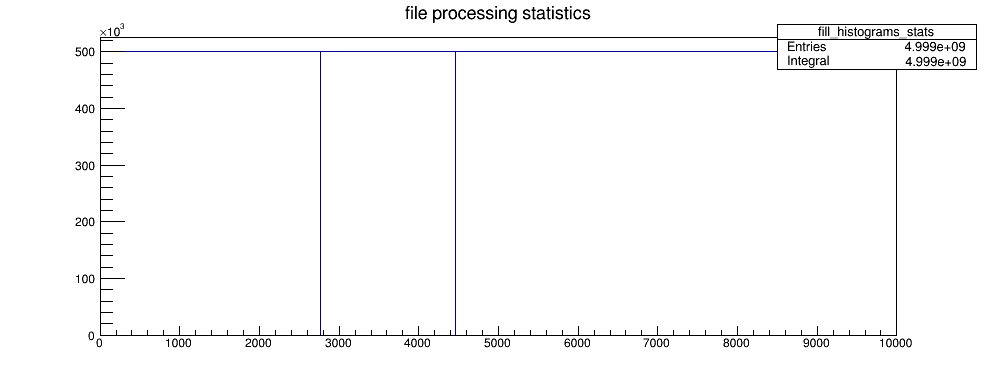

In [54]:
n = hviews["bcal"].draw('fill_histograms_stats', width=1000, stats="ien")

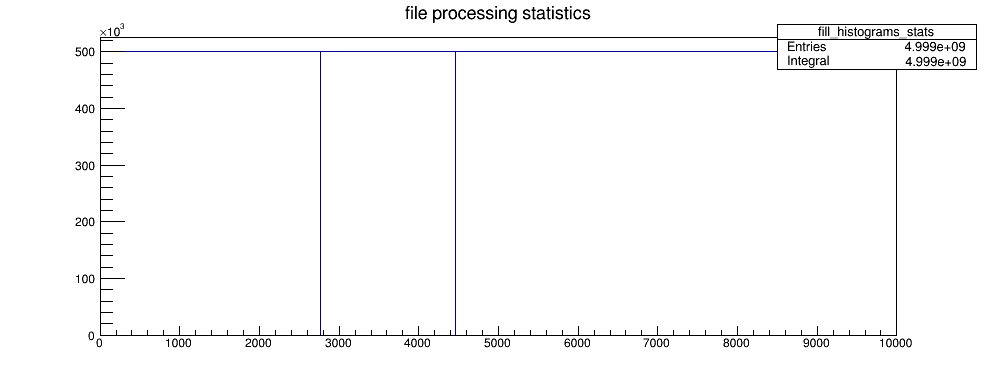

In [55]:
n = hviews["fcal"].draw('fill_histograms_stats', width=1000, stats="ien")

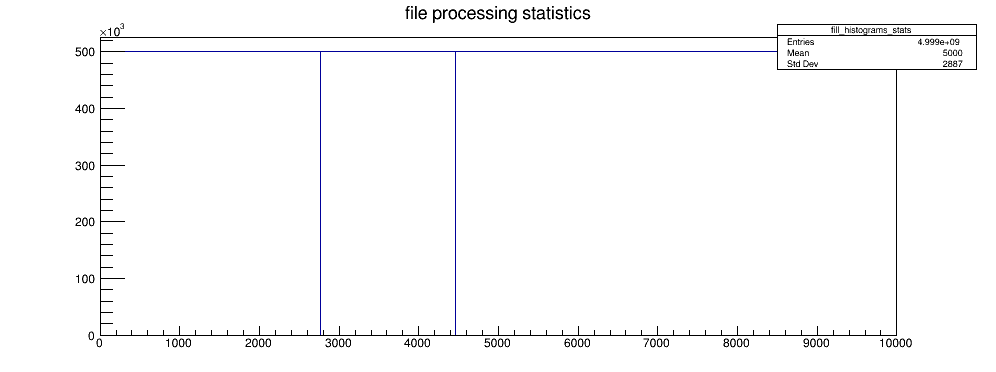

In [56]:
n = hviews["ftof"].draw('fill_histograms_stats', width=1000, stats="ien")

In [57]:
#for hset in ("sc", "cdc", "fdc", "bcal", "fcal", "ftof"):
#    hviews[hset].list_histograms(True)